#APM (Applied Predictive Modeling) with Trees

An integrated package for supervised learning, using over 50 kinds of
models, and a variety of different metrics:

      Applied Predictive Modeling
      M. Kuhn and K. Johnson
      Springer-Verlag, 2013.
      ISBN: 978-1-4614-6848-6 (Print)

http://link.springer.com/book/10.1007%2F978-1-4614-6849-3

[APM] is similar to [ISL] and [ESL] but emphasizes practical model
development/evaluation, including case histories with R scripts.

Its <tt>caret</tt> library (http://caret.r-forge.r-project.org) is integrated with R packages that support Supervised Learning using
mainstream model evaluation methods and  100 popular models.

List of models in caret: http://caret.r-forge.r-project.org/modelList.html

caret package overview: http://www.jstatsoft.org/v28/i05/paper

In [4]:

%load_ext rpy2.ipython


[APM] includes examples using the following packages/models:

C5.0, J48, M5, Nelder-Mead, PART, avNNet, cforest, ctree, cubist, earth,
enet, fda, gbm, glm, glmnet, knn, lda, lm, mda, nb, nnet, pam, pcr, pls,
rf, ridge, rpart, sparseLDA, svmPoly, svmRadial, treebag}

Installing and getting R example scripts:

<pre>
        install.packages("AppliedPredictiveModeling")
        library(AppliedPredictiveModeling)

        getPackages(1:19)  # download ALL packages used in chs 1-19, including caret
   
</pre>

In [5]:
%%R

not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

In [6]:
%%R

if (not.installed("caret")) install.packages("caret")

library(caret)

library(help=caret)

Documentation for package 'caret'
		Information on package 'caret'

Description:

Package:            caret
Version:            6.0-41
Date:               2015-01-02
Title:              Classification and Regression Training
Author:             Max Kuhn. Contributions from Jed Wing, Steve
                    Weston, Andre Williams, Chris Keefer, Allan
                    Engelhardt, Tony Cooper, Zachary Mayer, Brenton
                    Kenkel, the R Core Team, Michael Benesty, Reynald
                    Lescarbeau, Andrew Ziem, and Luca Scrucca.
Description:        Misc functions for training and plotting
                    classification and regression models
Maintainer:         Max Kuhn <Max.Kuhn@pfizer.com>
Depends:            R (>= 2.10), stats, lattice (>= 0.20), ggplot2
URL:                http://caret.r-forge.r-project.org/
Imports:            car, reshape2, foreach, methods, plyr, nlme,
                    BradleyTerry2
Suggests:           e1071, earth (>= 2.2-3), fastICA, 

Loading required package: lattice
Loading required package: ggplot2


In [7]:
%%R

if (not.installed("AppliedPredictiveModeling")) install.packages("AppliedPredictiveModeling")

library(AppliedPredictiveModeling)

library(help=AppliedPredictiveModeling)


Documentation for package 'AppliedPredictiveModeling'
		Information on package 'AppliedPredictiveModeling'

Description:

Package:            AppliedPredictiveModeling
Type:               Package
Title:              Functions and Data Sets for 'Applied Predictive
                    Modeling'
Version:            1.1-6
Date:               2014-07-24
Author:             Max Kuhn, Kjell Johnson
Maintainer:         Max Kuhn <mxkuhn@gmail.com>
Description:        A few functions and several data set for the
                    Springer book 'Applied Predictive Modeling'
URL:                http://appliedpredictivemodeling.com/
Depends:            R (>= 2.10)
Imports:            CORElearn, MASS, plyr, reshape2
Suggests:           caret (>= 6.0-22), lattice, ellipse
License:            GPL
Packaged:           2014-07-25 13:37:54 UTC; kuhna03
NeedsCompilation:   no
Repository:         CRAN
Date/Publication:   2014-07-25 18:42:22
Built:              R 3.1.2; ; 2015-01-10 01:37:59 UTC; unix

Ind

In [5]:
%%R

# Grid Search is often used in APM to search a model's parameter space, and
# some chapters use the "doMC" package to do Multi-Core computation
# (supported only on Linux or MacOS):

if (not.installed("doMC"))  install.packages("doMC")   # multicore computation in R

library(doMC)
library(help=doMC)

Documentation for package 'doMC'
		Information on package 'doMC'

Description:

Package:                            doMC
Type:                               Package
Title:                              Foreach parallel adaptor for the
                                    multicore package
Version:                            1.3.3
Author:                             Revolution Analytics
Maintainer:                         Revolution Analytics
                                    <packages@revolutionanalytics.com>
Description:                        Provides a parallel backend for the
                                    %dopar% function using the
                                    multicore functionality of the
                                    parallel package..
Depends:                            R (>= 2.14.0), foreach(>= 1.2.0),
                                    iterators(>= 1.0.0), parallel
Imports:                            utils
Enhances:                           compiler, RUni

Loading required package: foreach
foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com
Loading required package: iterators
Loading required package: parallel


Chapters use the following models:
<pre>
02_A_Short_Tour.R           lm, earth
04_Over_Fitting.R           svmRadial, glm
06_Linear_Regression.R      lm, pls, pcr, ridge, enet
07_Non-Linear_Reg.R         avNNet, earth, svmRadial, svmPoly, knn
08_Regression_Trees.R       rpart, ctree, M5, treebag, rf, cforest, gbm
10_Case_Study_Concrete.R    lm, pls, enet, earth, svmRadial, avNNet, rpart,
                            treebag, ctree, rf, gbm, cubist, M5, Nelder-Mead
11_Class_Performance.R      glm
12_Discriminant_Analysis.R  svmRadial, glm, lda, pls, glmnet, pam
13_Non-Linear_Class.R       mda, nnet, avNNet, fda, svmRadial, svmPoly, knn, nb
14_Class_Trees.R            rpart, J48, PART, treebag, rf, gbm, C5.0
16_Class_Imbalance.R        rf, glm, fda, svmRadial, rpart, C5.0
17_Job_Scheduling.R         rpart, lda, sparseLDA, nnet, pls, fda, rf, C5.0,
                            treebag, svmRadial
19_Feature_Select.R         rf, lda, svmRadial, nb, glm, knn, svmRadial, knn
</pre>

Training control methods used by the scripts:
<pre>
04_Over_Fitting.R           repeatedcv, cv, LOOCV, LGOCV, boot, boot632
06_Linear_Regression.R      cv
07_Non-Linear_Reg.R         cv
08_Regression_Trees.R       cv, oob
10_Case_Study_Concrete.R    repeatedcv
11_Class_Performance.R      repeatedcv
12_Discriminant_Analysis.R  cv, LGOCV
13_Non-Linear_Class.R       LGOCV
14_Class_Trees.R            LGOCV
16_Class_Imbalance.R        cv
17_Job_Scheduling.R         repeatedcv
19_Feature_Select.R         repeatedcv, cv
</pre>


#Print the script from any [APM] Chapter

In [6]:
%%R

APMchapters = c(
"",
"02_A_Short_Tour.R",
"03_Data_Pre_Processing.R",
"04_Over_Fitting.R",
"",
"06_Linear_Regression.R",
"07_Non-Linear_Reg.R",
"08_Regression_Trees.R",
"",
"10_Case_Study_Concrete.R",
"11_Class_Performance.R",
"12_Discriminant_Analysis.R",
"13_Non-Linear_Class.R",
"14_Class_Trees.R",
"",
"16_Class_Imbalance.R",
"17_Job_Scheduling.R",
"18_Importance.R",
"19_Feature_Select.R",
"CreateGrantData.R")

showChapterScript = function(n) {
  if (APMchapters[n] != "")
    file.show( file.path( scriptLocation(), APMchapters[n] ))
}

showChapterOutput = function(n) {
  if (APMchapters[n] != "")
    file.show( file.path( scriptLocation(), paste(APMchapters[n],"out",sep="") ))
}

runChapterScript = function(n) {
    if (APMchapters[n] != "")
    source( file.path( scriptLocation(), APMchapters[n] ),  echo=TRUE )
}

In [52]:
%%R

# showChapterScript(8)

NULL


In [53]:
%%R

# showChapterOutput(8)

NULL


In [62]:
%%R -w 600 -h 600

##  runChapterScript(8)

##       user    system   elapsed 
##  21280.849   500.609  6798.887 


NULL


#Chapter 8: Regression Trees

In [8]:
%%R

library(AppliedPredictiveModeling)

data(solubility)

### Create a control function that will be used across models. We
### create the fold assignments explicitly instead of relying on the
### random number seed being set to identical values.

library(caret)
set.seed(100)

indx <- createFolds(solTrainY, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", index = indx)


In [42]:
%%R

print(dim(solTrainXtrans))  #  951 observations,  228 features/predictors/variables
print(length(solTrainY))

print(colnames(solTrainXtrans))
# The solubility data has a zillion "fingerprint" features/predictors


[1] 951 228
[1] 951
  [1] "FP001"             "FP002"             "FP003"            
  [4] "FP004"             "FP005"             "FP006"            
  [7] "FP007"             "FP008"             "FP009"            
 [10] "FP010"             "FP011"             "FP012"            
 [13] "FP013"             "FP014"             "FP015"            
 [16] "FP016"             "FP017"             "FP018"            
 [19] "FP019"             "FP020"             "FP021"            
 [22] "FP022"             "FP023"             "FP024"            
 [25] "FP025"             "FP026"             "FP027"            
 [28] "FP028"             "FP029"             "FP030"            
 [31] "FP031"             "FP032"             "FP033"            
 [34] "FP034"             "FP035"             "FP036"            
 [37] "FP037"             "FP038"             "FP039"            
 [40] "FP040"             "FP041"             "FP042"            
 [43] "FP043"             "FP044"             "FP045"   

## Section 8.1 Basic Regression Trees

In [ ]:
%%R

library(rpart)

### Fit two CART models to show the initial splitting process. rpart
### only uses formulas, so we put the predictors and outcome into
### a common data frame first.

trainData <- solTrainXtrans
trainData$y <- solTrainY


In [39]:
%%R

rpStump <- rpart(y ~ ., data = trainData,
                 control = rpart.control(maxdepth = 1))
rpSmall <- rpart(y ~ ., data = trainData,
                 control = rpart.control(maxdepth = 2))

print(rpStump)
print(rpSmall)

n= 951 

node), split, n, deviance, yval
      * denotes terminal node

1) root 951 3979.303 -2.718570  
  2) NumCarbon>=3.776816 317 1114.200 -4.485363 *
  3) NumCarbon< 3.776816 634 1380.803 -1.835174 *
n= 951 

node), split, n, deviance, yval
      * denotes terminal node

1) root 951 3979.3030 -2.718570  
  2) NumCarbon>=3.776816 317 1114.2000 -4.485363  
    4) SurfaceArea2< 0.9776982 74  173.0767 -6.867838 *
    5) SurfaceArea2>=0.9776982 243  393.1730 -3.759835 *
  3) NumCarbon< 3.776816 634 1380.8030 -1.835174  
    6) MolWeight>=5.372821 104  173.9672 -3.328462 *
    7) MolWeight< 5.372821 530  929.4181 -1.542151 *


In [9]:
%%R

### Tune the model
library(caret)

set.seed(100)
cartTune <- train(x = solTrainXtrans, y = solTrainY,
                  method = "rpart",
                  tuneLength = 3, ####### 25,
                  trControl = ctrl)
print(cartTune)
## cartTune$finalModel

CART 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  cp         RMSE      Rsquared   RMSE SD    Rsquared SD
  0.0697151  1.402531  0.5265519  0.1230073  0.08459634 
  0.1377001  1.537348  0.4375590  0.1996033  0.09333503 
  0.3730051  1.956432  0.2781173  0.1989163  0.00920422 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was cp = 0.0697151. 


In [40]:
%%R

print(str(cartTune))  ### the 'cartTune' result from train() has a LOT of information in it


List of 19
 $ method      : chr "rpart"
 $ modelInfo   :List of 13
  ..$ label     : chr "CART"
  ..$ library   : chr "rpart"
  ..$ type      : chr [1:2] "Regression" "Classification"
  ..$ parameters:'data.frame':	1 obs. of  3 variables:
  .. ..$ parameter: Factor w/ 1 level "cp": 1
  .. ..$ class    : Factor w/ 1 level "numeric": 1
  .. ..$ label    : Factor w/ 1 level "Complexity Parameter": 1
  ..$ grid      :function (x, y, len = NULL)  
  .. ..- attr(*, "srcref")=Class 'srcref'  atomic [1:8] 7 26 23 19 26 19 7 23
  .. .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x110c4ed18> 
  ..$ loop      :function (grid)  
  .. ..- attr(*, "srcref")=Class 'srcref'  atomic [1:8] 24 26 29 19 26 19 24 29
  .. .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x110c4ed18> 
  ..$ fit       :function (x, y, wts, param, lev, last, classProbs, ...)  
  .. ..- attr(*, "srcref")=Class 'srcref'  atomic [1:8] 30 25 54 21 25 21 30 54
  .. .. .. ..- 

Loading required package: grid


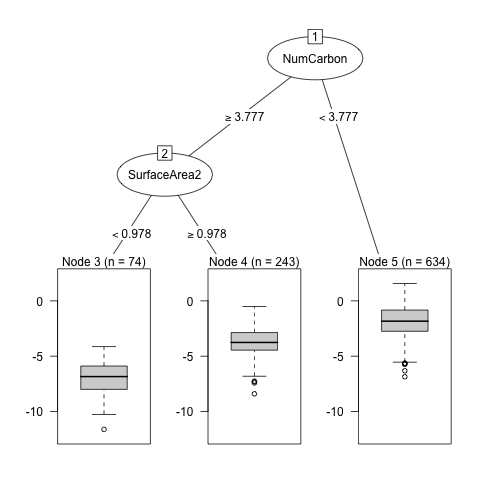

In [10]:
%%R

### Plot the tuning results
plot(cartTune, scales = list(x = list(log = 10)))

### Use the partykit package to make some nice plots. First, convert
### the rpart objects to party objects.

library(partykit)

cartTree <- as.party(cartTune$finalModel)
plot(cartTree)


In [11]:
%%R

### Get the variable importance. 'competes' is an argument that
### controls whether splits not used in the tree should be included
### in the importance calculations.

cartImp <- varImp( cartTune, scale = FALSE, competes = FALSE )
print(cartImp)

### Save the test set results in a data frame
testResults <- data.frame(obs = solTestY,
                          CART = predict(cartTune, solTestXtrans))

rpart variable importance

  only 20 most important variables shown (out of 228)

             Overall
SurfaceArea2  0.4918
NumCarbon     0.3730
NumDblBonds   0.0000
FP026         0.0000
FP193         0.0000
NumOxygen     0.0000
FP027         0.0000
FP036         0.0000
NumNitrogen   0.0000
FP043         0.0000
FP020         0.0000
FP045         0.0000
FP047         0.0000
FP179         0.0000
FP030         0.0000
FP064         0.0000
FP094         0.0000
FP031         0.0000
FP103         0.0000
FP157         0.0000


In [43]:
%%R

#  Explain how "variable importance" depends on the model involved:

?varImp 

R Help on 'varImp'varImp                  package:caret                  R Documentation

_C_a_l_c_u_l_a_t_i_o_n _o_f _v_a_r_i_a_b_l_e _i_m_p_o_r_t_a_n_c_e _f_o_r _r_e_g_r_e_s_s_i_o_n _a_n_d _c_l_a_s_s_i_f_i_c_a_t_i_o_n
_m_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     A generic method for calculating variable importance for objects
     produced by 'train' and method specific methods

_U_s_a_g_e:

     ## S3 method for class 'train'
     varImp(object, useModel = TRUE, nonpara = TRUE, scale = TRUE, ...)
     
     ## S3 method for class 'earth'
     varImp(object, value = "gcv", ...)
     
     ## S3 method for class 'fda'
     varImp(object, value = "gcv", ...)
     
     ## S3 method for class 'rpart'
     varImp(object, surrogates = FALSE, competes = TRUE, ...)
     
     ## S3 method for class 'randomForest'
     varImp(object, ...)
     
     ## S3 method for class 'gbm'
     varImp(object, numTrees, ...

In [12]:
%%R

### Tune the conditional inference tree

cGrid <- data.frame(mincriterion = sort(c(.95, seq(.75, .99, length = 2))))

set.seed(100)
ctreeTune <- train(x = solTrainXtrans, y = solTrainY,
                   method = "ctree",
                   tuneGrid = cGrid,
                   trControl = ctrl)
print(ctreeTune)

Loading required package: party
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: 'party'

The following objects are masked from 'package:partykit':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal

Conditional Inference Tree 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  mincriterion  RMSE       Rsquared   RMSE SD    Rsquared SD
  0.75          0.9269810  0.7903849  0.1072444  0.06710406 
  0.95          0.9403788  0.7847694  0.1038905  0.06301081 
  

In [46]:
%%R

#Explain what ctree (conditional inference tree) is:

# "Conditional inference trees estimate a regression relationship by
#     binary recursive partitioning in a conditional inference
#     framework. Roughly, the algorithm works as follows: 1) Test the
#     global null hypothesis of independence between any of the input
#     variables and the response (which may be multivariate as well).
#     Stop if this hypothesis cannot be rejected. Otherwise select the
#     input variable with strongest association to the response. This
#     association is measured by a p-value corresponding to a test for
#     the partial null hypothesis of a single input variable and the
#     response.  2) Implement a binary split in the selected input
#     variable.  3) Recursively repeate steps 1) and 2).

?partykit::ctree

R Help on 'ctree'ctree                 package:partykit                 R Documentation

_C_o_n_d_i_t_i_o_n_a_l _I_n_f_e_r_e_n_c_e _T_r_e_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Recursive partitioning for continuous, censored, ordered, nominal
     and multivariate response variables in a conditional inference
     framework.

_U_s_a_g_e:

     ctree(formula, data, weights, subset, na.action = na.pass,
         control = ctree_control(...), ytrafo = NULL, scores = NULL, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a symbolic description of the model to be fit.

    data: a data frame containing the variables in the model.

  subset: an optional vector specifying a subset of observations to be
          used in the fitting process.

 weights: an optional vector of weights to be used in the fitting
          process. Only non-negative integer valued weights are
          allowed.

na.action: a function which indicates what should happen when the 

Help on topic 'ctree' was found in the following packages:

  Package               Library
  party                 /Library/Frameworks/R.framework/Versions/3.1/Resources/library
  partykit              /Library/Frameworks/R.framework/Versions/3.1/Resources/library

Error: .onLoad failed in loadNamespace() for 'tcltk', details:
  call: dyn.load(file, DLLpath = DLLpath, ...)
  error: unable to load shared object '/Library/Frameworks/R.framework/Versions/3.1/Resources/library/tcltk/libs/tcltk.so':
  dlopen(/Library/Frameworks/R.framework/Versions/3.1/Resources/library/tcltk/libs/tcltk.so, 10): Library not loaded: /usr/X11/lib/libXft.2.dylib
  Referenced from: /usr/local/lib/libtk8.6.dylib
  Reason: image not found


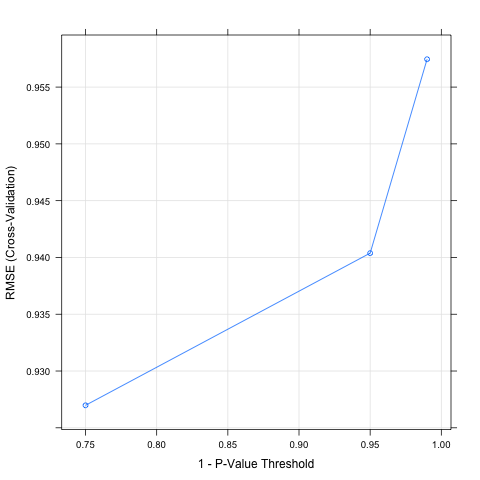

In [15]:
%%R

plot(ctreeTune)

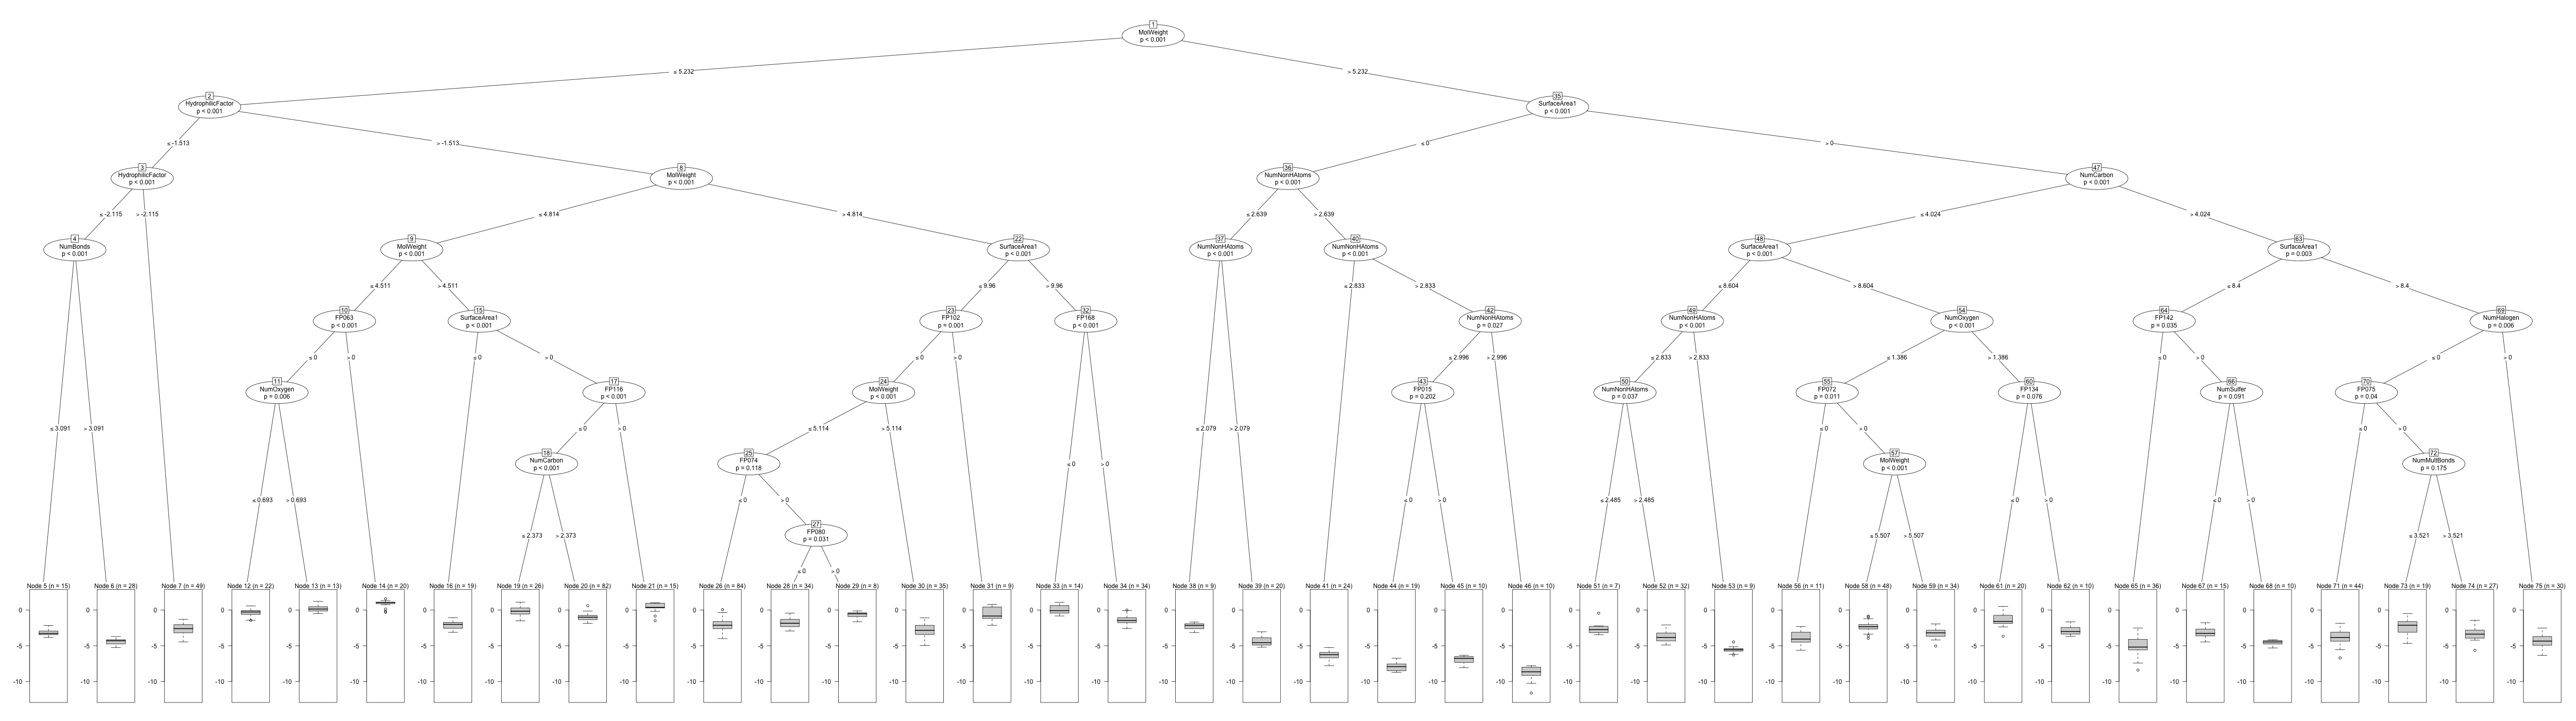

In [24]:
%%R -h 1400 -w 5000

##ctreeTune$finalModel
plot(ctreeTune$finalModel)

testResults$cTree <- predict(ctreeTune, solTestXtrans)

## Section 8.2 Regression Model Trees and 8.3 Rule-Based Models

In [ ]:
%%R

### Tune the model tree. Using method = "M5" actually tunes over the
### tree- and rule-based versions of the model. M = 10 is also passed
### in to make sure that there are larger terminal nodes for the
### regression models.

HAVE_LEGACY_JAVA_FOR_RWEKA = FALSE

if (HAVE_LEGACY_JAVA_FOR_RWEKA) {
set.seed(100)
m5Tune <- train(x = solTrainXtrans, y = solTrainY,
                method = "M5",
                trControl = ctrl,
                control = Weka_control(M = 10))
print(m5Tune)

plot(m5Tune)

## m5Tune$finalModel

## plot(m5Tune$finalModel)

### Show the rule-based model too

ruleFit <- M5Rules(y~., data = trainData, control = Weka_control(M = 10))
print(ruleFit)

}

## Section 8.4 Bagged Trees

In [25]:
%%R

### Optional: parallel processing can be used via the 'do' packages,
### such as doMC, doMPI etc. We used doMC (not on Windows) to speed
### up the computations.

### WARNING: Be aware of how much memory is needed to parallel
### process. It can very quickly overwhelm the available hardware. The
### estimate of the median memory usage (VSIZE = total memory size)
### was 9706M for a core, but could range up to 9706M. This becomes
### severe when parallelizing randomForest() and (especially) calls
### to cforest().

### WARNING 2: The RWeka package does not work well with some forms of
### parallel processing, such as mutlicore (i.e. doMC).

### library(doMC)
### registerDoMC(5)

set.seed(100)

treebagTune <- train(x = solTrainXtrans, y = solTrainY,
                     method = "treebag",
                     nbagg = 20,  #### 50,
                     trControl = ctrl)

print(treebagTune)


Loading required package: ipred
Loading required package: plyr

Attaching package: 'plyr'

The following object is masked from 'package:modeltools':

    empty

Bagged CART 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results

  RMSE       Rsquared   RMSE SD     Rsquared SD
  0.9111677  0.8042041  0.06591128  0.04067097 

 


In [50]:
%%R

?bag

R Help on 'bag'bag.default               package:caret                R Documentation

_A _G_e_n_e_r_a_l _F_r_a_m_e_w_o_r_k _F_o_r _B_a_g_g_i_n_g

_D_e_s_c_r_i_p_t_i_o_n:

     'bag' provides a framework for bagging classification or
     regression models. The user can provide their own functions for
     model building, prediction and aggregation of predictions (see
     Details below).

_U_s_a_g_e:

     bag(x, ...)
     
     ## Default S3 method:
     bag(x, y, B = 10, vars = ncol(x), bagControl = NULL, ...)
     
     bagControl(fit = NULL, 
                predict = NULL, 
                aggregate = NULL,
                downSample = FALSE,
                oob = TRUE,
                allowParallel = TRUE)
     
     ldaBag
     plsBag
     nbBag
     ctreeBag
     svmBag
     nnetBag
     
     ## S3 method for class 'bag'
     predict(object, newdata = NULL, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a matrix or data frame of 

## Section 8.5 Random Forests

Random Forest 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   RMSE SD     Rsquared SD
   10   0.7121826  0.8861432  0.06522278  0.02141808 
  119   0.6554979  0.8966943  0.07156553  0.02662282 
  228   0.6536997  0.8966770  0.07345123  0.02876882 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 228. 


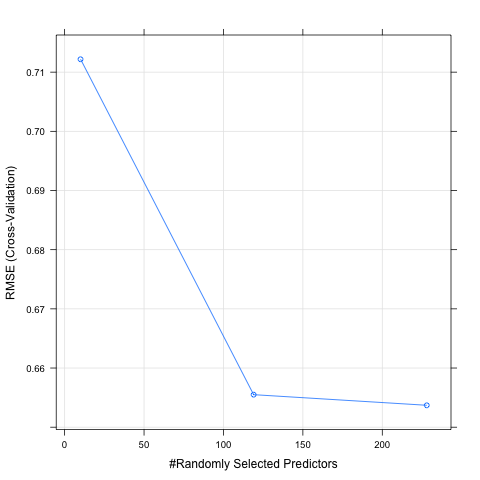

In [27]:
%%R

mtryGrid <- data.frame(mtry = floor(seq(10, ncol(solTrainXtrans), length = 3))) ##### 10)))

### Tune the model using cross-validation
set.seed(100)
rfTune <- train(x = solTrainXtrans, y = solTrainY,
                method = "rf",
                tuneGrid = mtryGrid,
                ntree = 100, #### 1000,
                importance = TRUE,
                trControl = ctrl)
print(rfTune)

plot(rfTune)


In [28]:
%%R

rfImp <- varImp(rfTune, scale = FALSE)
print(rfImp)

rf variable importance

  only 20 most important variables shown (out of 228)

                  Overall
NumCarbon          22.455
MolWeight          19.231
SurfaceArea2       16.701
SurfaceArea1       13.093
NumHydrogen        12.327
NumNonHAtoms       11.872
HydrophilicFactor  11.001
NumRotBonds        10.506
FP116               8.928
NumMultBonds        8.093
NumAtoms            6.930
NumOxygen           6.731
NumBonds            6.529
NumNitrogen         6.229
FP075               5.983
NumChlorine         5.248
NumAromaticBonds    4.991
NumHalogen          4.692
FP003               4.673
FP172               4.426


Random Forest 

951 samples
228 predictors

No pre-processing
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared 
   10   0.7352339  0.8708113
  119   0.6609806  0.8955879
  228   0.6602538  0.8958174

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 228. 


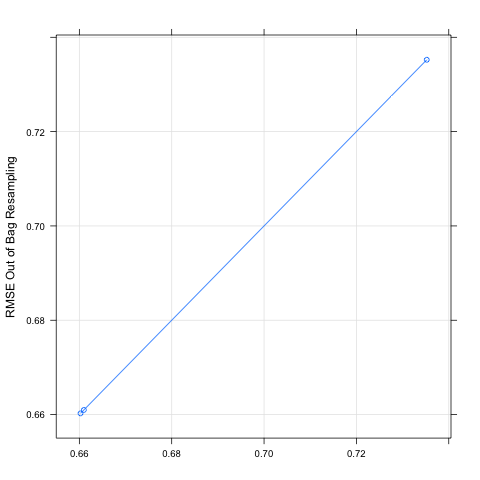

In [29]:
%%R

### Tune the model using the OOB estimates
ctrlOOB <- trainControl(method = "oob")
set.seed(100)
rfTuneOOB <- train(x = solTrainXtrans, y = solTrainY,
                   method = "rf",
                   tuneGrid = mtryGrid,
                   ntree = 100, #### 1000,
                   importance = TRUE,
                   trControl = ctrlOOB)
print(rfTuneOOB)

plot(rfTuneOOB)

Conditional Inference Random Forest 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   RMSE SD     Rsquared SD
   10   0.9815379  0.8080797  0.07506250  0.02694012 
  119   0.8160623  0.8468000  0.04890697  0.02734262 
  228   0.8445459  0.8311680  0.05438187  0.03893247 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 119. 


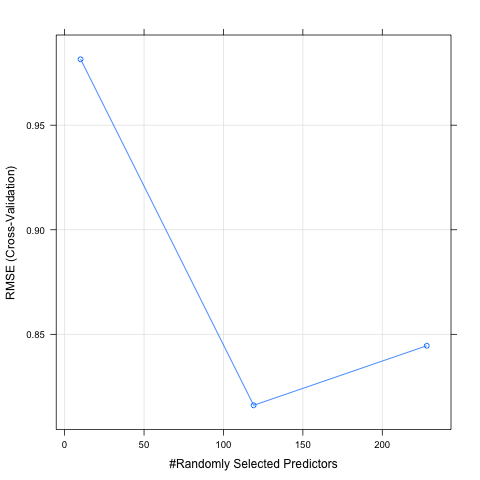

In [30]:
%%R

### Tune the conditional inference forests
set.seed(100)
condrfTune <- train(x = solTrainXtrans, y = solTrainY,
                    method = "cforest",
                    tuneGrid = mtryGrid,
                    controls = cforest_unbiased(ntree = 100), ####  1000),
                    trControl = ctrl)
print(condrfTune)

plot(condrfTune)

Conditional Inference Random Forest 

951 samples
228 predictors

No pre-processing
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared 
   10   0.8905124  0.8464993
  119   0.7063588  0.8902709
  228   0.7094478  0.8856253

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 119. 


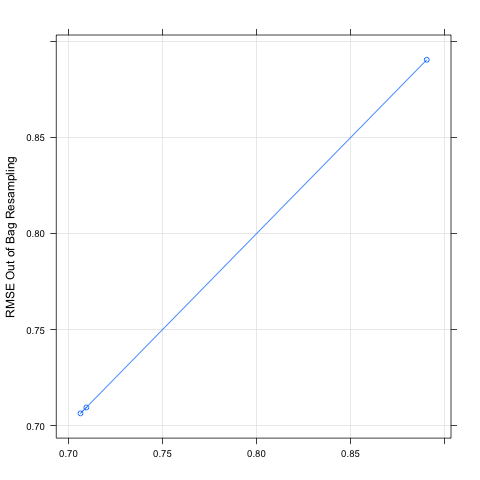

In [32]:
%%R

set.seed(100)
condrfTuneOOB <- train(x = solTrainXtrans, y = solTrainY,
                       method = "cforest",
                       tuneGrid = mtryGrid,
                       controls = cforest_unbiased(ntree = 100), #### 1000),
                       trControl = trainControl(method = "oob"))
print(condrfTuneOOB)

plot(condrfTuneOOB)

## Section 8.6 Boosting

Loading required package: gbm
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1
Stochastic Gradient Boosting 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  shrinkage  interaction.depth  RMSE       Rsquared   RMSE SD     Rsquared SD
  0.01       1                  1.5814720  0.6392061  0.12069499  0.07198689 
  0.01       5                  1.2252642  0.7953909  0.07814468  0.04016721 
  0.10       1                  0.8552438  0.8331436  0.05804792  0.03044044 
  0.10       5                  0.6487699  0.8979620  0.05265095  0.02324527 

Tuning parameter 'n.trees' was held constant at a value of 100
RMSE was used to select the optimal model using  the smallest value.
The

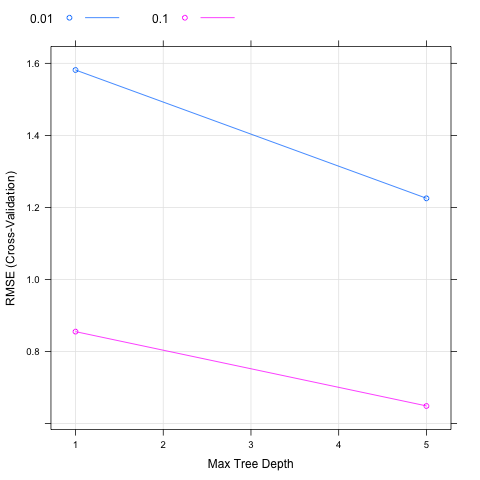

In [33]:
%%R

gbmGrid <- expand.grid(interaction.depth = seq(1, 5, by = 4), #### seq(1, 7, by = 2),
                       n.trees = 100, #### seq(100, 1000, by = 50),
                       shrinkage = c(0.01, 0.1))
set.seed(100)
gbmTune <- train(x = solTrainXtrans, y = solTrainY,
                 method = "gbm",
                 tuneGrid = gbmGrid,
                 trControl = ctrl,
                 verbose = FALSE)
print(gbmTune)

plot(gbmTune, auto.key = list(columns = 4, lines = TRUE))

In [34]:
%%R

gbmImp <- varImp(gbmTune, scale = FALSE)
print(gbmImp)

gbm variable importance

  only 20 most important variables shown (out of 228)

                  Overall
NumCarbon         2666.64
MolWeight         2532.66
SurfaceArea1      1179.05
SurfaceArea2       782.51
HydrophilicFactor  693.00
NumAromaticBonds   524.02
NumChlorine        329.63
NumNonHAtoms       206.39
FP075              186.37
NumMultBonds       122.44
NumRotBonds         98.79
NumOxygen           96.52
FP013               89.85
NumHydrogen         69.83
FP059               64.98
FP172               59.90
FP092               50.90
FP147               50.29
FP141               46.86
FP135               46.76


## Section 8.7 Cubist

Loading required package: Cubist
Cubist 

951 samples
228 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 

Summary of sample sizes: 856, 857, 855, 856, 856, 855, ... 

Resampling results across tuning parameters:

  committees  neighbors  RMSE       Rsquared   RMSE SD     Rsquared SD
   1          0          0.7056415  0.8785997  0.05868727  0.03123715 
   1          1          0.7346556  0.8732658  0.06877312  0.02930998 
   1          3          0.6562149  0.8955182  0.07071569  0.03054467 
   5          0          0.6366242  0.9016094  0.06623599  0.02664453 
   5          1          0.6762428  0.8904763  0.07928362  0.02757115 
   5          3          0.6079347  0.9094514  0.07316413  0.02658034 
  10          0          0.6191486  0.9069253  0.06514456  0.02531430 
  10          1          0.6615459  0.8949564  0.07632913  0.02559574 
  10          3          0.5936012  0.9136067  0.07298077  0.02481292 

RMSE was used to select the optimal model using  the s

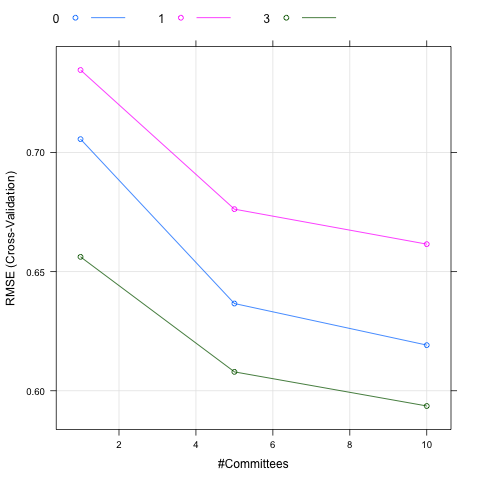

In [35]:
%%R

cbGrid <- expand.grid(committees = c(1, 5, 10),  #### c(1:10, 20, 50, 75, 100),
                      neighbors = c(0,1,3)) ### c(0, 1, 5, 9))

set.seed(100)
cubistTune <- train(solTrainXtrans, solTrainY,
                    "cubist",
                    tuneGrid = cbGrid,
                    trControl = ctrl)
print(cubistTune)

plot(cubistTune, auto.key = list(columns = 4, lines = TRUE))

In [36]:
%%R

cbImp <- varImp(cubistTune, scale = FALSE)
print(cbImp)

cubist variable importance

  only 20 most important variables shown (out of 228)

                  Overall
NumCarbon            71.5
MolWeight            66.0
SurfaceArea2         55.5
NumHydrogen          55.5
NumOxygen            51.5
SurfaceArea1         51.5
NumAtoms             50.0
NumBonds             49.5
NumNonHAtoms         49.5
NumNonHBonds         49.0
HydrophilicFactor    45.5
NumRotBonds          45.5
NumMultBonds         41.5
NumNitrogen          41.0
NumHalogen           37.0
NumDblBonds          37.0
NumRings             32.5
FP065                29.0
FP085                28.5
NumAromaticBonds     28.5


#Chapter 10:  Case Study -- Concrete Compressive Strength

In [54]:
%%R

# showChapterScript(10)

NULL


In [55]:
%%R

# showChapterOutput(10)

NULL


In [65]:
%%R

# Try this if you are very patient --
# in the APM version of the output file:

##############   THE RUN TIME FOR THIS SCRIPT IS LISTED AS 5.6 HOURS.

# Chs 10 and 17 evaluate many different models in case studies.
# To run the Ch.10 script:

VERY_PATIENT = FALSE

if (VERY_PATIENT) {
   current_working_directory = getwd()  # remember current directory

   chapter_code_directory = scriptLocation()

   setwd( chapter_code_directory )
   print(dir())

   print(source("10_Case_Study_Concrete.R", echo=TRUE))

   setwd(current_working_directory)  # return to working directory
}

##       user    system   elapsed 
##  20277.196   121.470  4043.395 


#Chapter 11:  Class Predictions

In [56]:
%%R

# showChapterScript(11)

NULL


In [57]:
%%R

# showChapterOutput(11)

NULL



> ################################################################################
> ### R code from Applied Predictive Modeling (2013) by Kuhn and Jo .... [TRUNCATED] 

> ### Simulate some two class data with two predictors
> set.seed(975)

> training <- quadBoundaryFunc(500)

> testing <- quadBoundaryFunc(1000)

> testing$class2 <- ifelse(testing$class == "Class1", 1, 0)

> testing$ID <- 1:nrow(testing)

> ### Fit models
> library(MASS)

> qdaFit <- qda(class ~ X1 + X2, data = training)

> library(randomForest)

> rfFit <- randomForest(class ~ X1 + X2, data = training, ntree = 2000)

> ### Predict the test set
> testing$qda <- predict(qdaFit, testing)$posterior[,1]

> testing$rf <- predict(rfFit, testing, type = "prob")[,1]

> ### Generate the calibration analysis
> library(caret)

> calData1 <- calibration(class ~ qda + rf, data = testing, cuts = 10)

> ### Plot the curve
> xyplot(calData1, auto.key = list(columns = 2))

> ### To calibrate the data, treat the probabilities as input

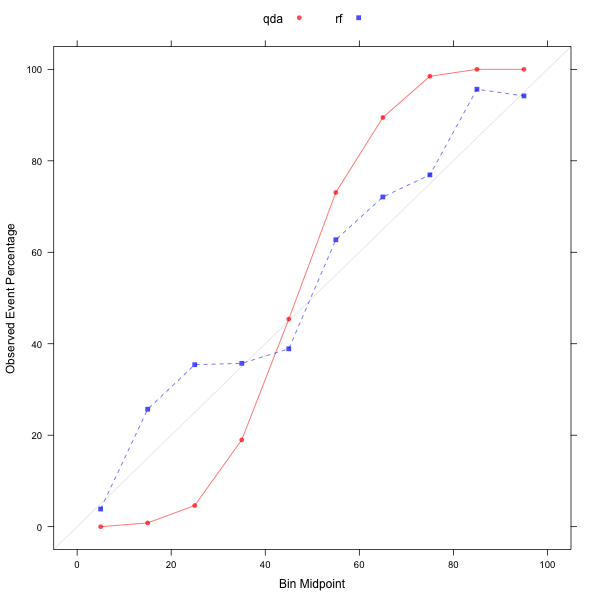

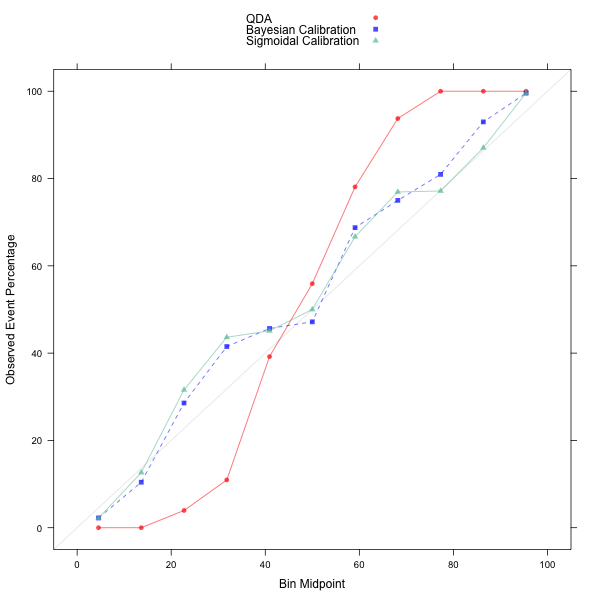

In [95]:
%%R -w 600 -h 600

runChapterScript(11)

##     user  system elapsed 
##   11.120   0.526  11.698 

#Chapter 12: Discriminant Analysis & Other Linear Classification Models

In [58]:
%%R

# showChapterScript(12)

NULL


In [94]:
%%R
summary(GermanCredit)

                                        status       duration   
 ... < 100 DM                              :274   Min.   : 4.0  
 0 <= ... < 200 DM                         :269   1st Qu.:12.0  
 ... >= 200 DM / salary for at least 1 year: 63   Median :18.0  
 no checking account                       :394   Mean   :20.9  
                                                  3rd Qu.:24.0  
                                                  Max.   :72.0  
                                                                
                                     credit_history                purpose   
 no credits taken/all credits paid back duly: 40    domestic appliances:280  
 all credits at this bank paid back duly    : 49    car (new)          :234  
 existing credits paid back duly till now   :530    radio/television   :181  
 delay in paying off in the past            : 88    car (used)         :103  
 critical account/other credits existing    :293    others             : 97  
            

In [62]:
%%R

# showChapterOutput(12)

NULL


In [71]:
%%R -w 600 -h 600

## runChapterScript(12)

##        user     system    elapsed 
##  376332.996   8337.928  35694.682 


NULL


In [60]:
%%R

# showChapterScript(13)

NULL


#Chapter 13: Non-Linear Classification Models

In [63]:
%%R

# showChapterOutput(13)

NULL


In [74]:
%%R -w 600 -h 600

##  runChapterScript(13)

##       user    system   elapsed 
##  313451.24   2270.67  52861.72 


NULL


#Chapter 14: Classification Trees and Rule-Based Models

In [64]:
%%R

# showChapterScript(14)

NULL


In [65]:
%%R

# showChapterOutput(14)

NULL


In [14]:
%%R

loadAPM = function(file) {
    load( file.path( scriptLocation(), "../data", file ) )
}

## Section 14.1 Basic Classification Trees

In [6]:
%%R

data(hepatic)   # Hepatic Injury dataset

?injury

R Help on 'injury'hepatic       package:AppliedPredictiveModeling        R Documentation

_H_e_p_a_t_i_c _I_n_j_u_r_y _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     This data set was used to develop a model for predicting
     compounds' probability of causing hepatic injury (i.e. liver
     damage). This data set consisted of 281 unique compounds; 376
     predictors were measured or computed for each. The response was
     categorical (either "None", "Mild" or "Severe" ),and was highly
     unbalanced.

     This kind of response often occurs in pharmaceutical data because
     companies steer away from creating molecules that have undesirable
     characteristics. Therefore, well-behaved molecules often greatly
     outnumber undesirable molecules. The predictors consisted of
     measurements from 184 biological screens and 192 chemical feature
     predictors. The biological predictors represent activity for each
     screen and take values between 0 and 10 wi

In [7]:
%%R

print(ls())  # This dataset is stored in three variables:  chem, bio, injury

Hep_X = cbind( chem, bio )
Hep_y = injury

HepaticInjury = data.frame( chem, bio, injury )

print(summary(HepaticInjury))


[1] "bio"           "chem"          "injury"        "not.installed"
       X1                 X2               X3                X4        
 Min.   :   0.000   Min.   :-7.055   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:   0.006   1st Qu.: 0.082   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :   0.430   Median : 2.051   Median :0.00000   Median :0.0000  
 Mean   :  69.758   Mean   : 1.955   Mean   :0.08185   Mean   :0.0605  
 3rd Qu.:   5.420   3rd Qu.: 3.834   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :9600.000   Max.   :14.360   Max.   :3.00000   Max.   :2.0000  
       X5               X6               X7              X8         
 Min.   :  5.00   Min.   : 0.000   Min.   : 0.00   Min.   :0.00000  
 1st Qu.: 16.00   1st Qu.: 4.000   1st Qu.:11.00   1st Qu.:0.00000  
 Median : 22.00   Median : 5.000   Median :18.00   Median :0.00000  
 Mean   : 24.17   Mean   : 6.189   Mean   :17.95   Mean   :0.01779  
 3rd Qu.: 29.00   3rd Qu.: 8.000   3rd Qu.:22.00   3rd Qu.:0.00000  
 Max.   :100.0

In [13]:
%%R

library(pROC)

print(library(help=pROC))

Documentation for package 'pROC'
		Information on package 'pROC'

Description:

Package:            pROC
Type:               Package
Title:              display and analyze ROC curves
Version:            1.7.3
Date:               2014-06-12
Encoding:           UTF-8
Depends:            R (>= 2.13)
Imports:            plyr, utils, methods, Rcpp (>= 0.11.1)
Suggests:           microbenchmark, tcltk, MASS, logcondens, doMC,
                    doSNOW
LinkingTo:          Rcpp
Author:             Xavier Robin, Natacha Turck, Alexandre Hainard,
                    Natalia Tiberti, Fr'ed'erique Lisacek, Jean-Charles
                    Sanchez and Markus M"uller.
Maintainer:         Xavier Robin <robin@lindinglab.org>
Description:        Tools for visualizing, smoothing and comparing
                    receiver operating characteristic (ROC curves).
                    (Partial) area under the curve (AUC) can be
                    compared with statistical tests based on
                   

In [9]:
%%R

inTrain <- createDataPartition(injury, p = .8)[[1]]
HepTrain <- HepaticInjury[ inTrain, ]
HepTest  <- HepaticInjury[-inTrain, ]


CART 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  cp          Accuracy   Kappa      Accuracy SD  Kappa SD
  0.00000000  1.0000000  1.0000000  0            0       
  0.02689022  1.0000000  1.0000000  0            0       
  0.05378045  1.0000000  1.0000000  0            0       
  0.08067067  1.0000000  1.0000000  0            0       
  0.10756090  1.0000000  1.0000000  0            0       
  0.13445112  1.0000000  1.0000000  0            0       
  0.16134135  1.0000000  1.0000000  0            0       
  0.18823157  1.0000000  1.0000000  0            0       
  0.21512180  1.0000000  1.0000000  0            0       
  0.24201202  0.8928571  0.8055556  0            0       
  0.26890225  0.8928571  0.8055556  0            0       
  0.29579247  0.8928571  0.8055556  0

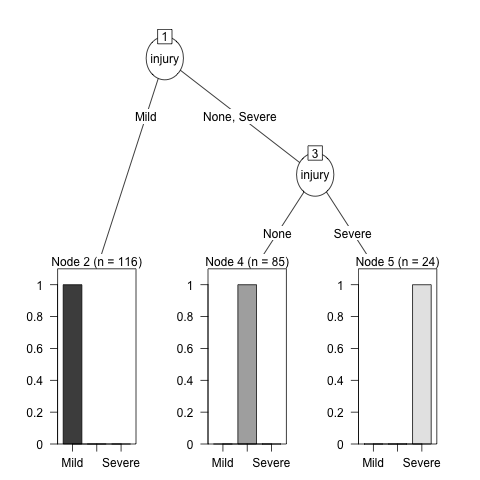

In [19]:
%%R

ctrl <- trainControl(method = "LGOCV",
                     # summaryFunction = twoClassSummary,
                     classProbs = TRUE,
                     # index = list(TrainSet = HepTrain),
                     savePredictions = TRUE)

set.seed(476)
rpartFit <- train(x = HepTrain,
                  y = HepTrain$injury,
                  method = "rpart",
                  tuneLength = 30,
                  metric = "ROC",
                  trControl = ctrl)

print(rpartFit)

library(partykit)

plot(as.party(rpartFit$finalModel))

In [20]:
%%R

rpartPredTune <- merge(rpartFit$pred,  rpartFit$bestTune)
rpartCM <- confusionMatrix(rpartFit, norm = "none")
print(rpartCM)

print(str(rpartFit))

print(length(rpartFit$pred$obs))
print(length(rpartFit$pred$pred == rpartFit$pred$obs))

successful = (rpartFit$pred$pred == rpartFit$pred$obs) * 1

Repeated Train/Test Splits Estimated (25 reps, 0.75%) Confusion Matrix 

(entries are un-normalized counts)
 
          Reference
Prediction Mild None Severe
    Mild     29    0      0
    None      0   21      0
    Severe    0    0      6

List of 19
 $ method      : chr "rpart"
 $ modelInfo   :List of 13
  ..$ label     : chr "CART"
  ..$ library   : chr "rpart"
  ..$ type      : chr [1:2] "Regression" "Classification"
  ..$ parameters:'data.frame':	1 obs. of  3 variables:
  .. ..$ parameter: Factor w/ 1 level "cp": 1
  .. ..$ class    : Factor w/ 1 level "numeric": 1
  .. ..$ label    : Factor w/ 1 level "Complexity Parameter": 1
  ..$ grid      :function (x, y, len = NULL)  
  .. ..- attr(*, "srcref")=Class 'srcref'  atomic [1:8] 7 26 23 19 26 19 7 23
  .. .. .. ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x1124e6958> 
  ..$ loop      :function (grid)  
  .. ..- attr(*, "srcref")=Class 'srcref'  atomic [1:8] 24 26 29 19 26 19 24 29
  .. .. .. ..- attr(*,

In [21]:
%%R

library(pROC)

rpartRoc <- roc(response = rpartFit$pred$obs,
                predictor = successful) ### rpartFit$pred$successful) # ,
#                levels = rev(levels(rpartFit$pred$obs)))
print(rpartRoc)


Call:
roc.default(response = rpartFit$pred$obs, predictor = successful)

Data: successful in 21750 controls (rpartFit$pred$obs Mild) < 15750 cases (rpartFit$pred$obs None).
Area under the curve: 0.5


CART 

225 samples
376 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  cp           Accuracy   Kappa      Accuracy SD  Kappa SD  
  0.000000000  0.5442857  0.1664315  0.06821647   0.12692398
  0.006643467  0.5564286  0.1836570  0.06986381   0.13061032
  0.013286935  0.5728571  0.2037881  0.06498463   0.12695765
  0.019930402  0.5828571  0.2240034  0.06310928   0.11936511
  0.026573869  0.5914286  0.2383990  0.05654449   0.10552498
  0.033217336  0.5942857  0.2465030  0.05611994   0.10452112
  0.039860804  0.5950000  0.2492180  0.04426027   0.08528447
  0.046504271  0.5957143  0.2504282  0.04370442   0.08390539
  0.053147738  0.5985714  0.2553997  0.04316605   0.08451242
  0.059791205  0.5971429  0.2537918  0.04641712   0.08840919
  0.066434673  0.6064286  0.2721356  0.04903404   0.09015982
 

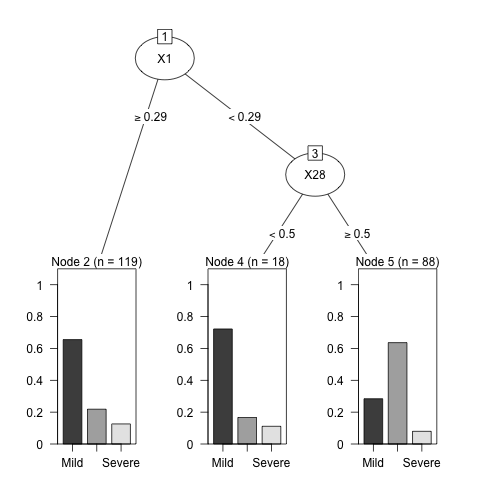

In [22]:
%%R

set.seed(476)
rpartFactorFit <- train(x = HepTrain[,(1:(ncol(HepTrain)-1))],
                        y = HepTrain$injury,
                        method = "rpart",
                        tuneLength = 30,
                        metric = "ROC",
                        trControl = ctrl)
print(rpartFactorFit)
plot(as.party(rpartFactorFit$finalModel))


In [23]:
%%R

rpartFactorPredTune <- merge(rpartFactorFit$pred,  rpartFactorFit$bestTune)
rpartFactorCM <- confusionMatrix(rpartFactorFit, norm = "none")
print(rpartFactorCM)


Repeated Train/Test Splits Estimated (25 reps, 0.75%) Confusion Matrix 

(entries are un-normalized counts)
 
          Reference
Prediction Mild None Severe
    Mild   20.8  7.9    4.3
    None    8.2 13.1    1.7
    Severe  0.0  0.0    0.0



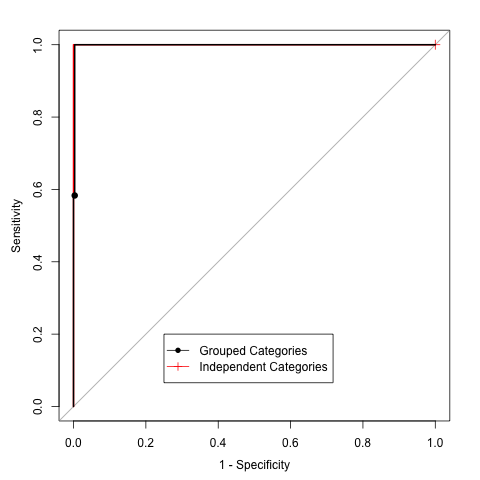

In [24]:
%%R

rpartFactorFit_successful = (rpartFactorFit$pred$pred == rpartFactorFit$pred$obs) * 1

rpartFactorRoc <- roc(response = rpartFactorFit$pred$obs,
                      predictor = rpartFactorFit_successful, ### rpartFactorFit$pred$successful,
                      levels = rev(levels(rpartFactorFit$pred$obs)))

plot(rpartRoc, type = "s", print.thres = c(.5),
     print.thres.pch = 3,
     print.thres.pattern = "",
     print.thres.cex = 1.2,
     col = "red", legacy.axes = TRUE,
     print.thres.col = "red")
plot(rpartFactorRoc,
     type = "s",
     add = TRUE,
     print.thres = c(.5),
     print.thres.pch = 16, legacy.axes = TRUE,
     print.thres.pattern = "",
     print.thres.cex = 1.2)
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))


In [10]:
%%R
print(dim(Hep_X))

[1] 281 376


In [15]:
%%R

LEGACY_JAVA_IS_WORKING = FALSE

if (LEGACY_JAVA_IS_WORKING) {
set.seed(476)
j48FactorFit <- train(x = HepTrain,
                      y = HepTrain$injury,
                      method = "J48",
                      metric = "ROC",
                      trControl = ctrl)
print(j48FactorFit)

j48FactorCM <- confusionMatrix(j48FactorFit, norm = "none")
print(j48FactorCM)

j48FactorFit_pred_successful = (j48FactorFit$pred$pred == j48FactorFit$pred$obs) * 1

j48FactorRoc <- roc(response = j48FactorFit$pred$obs,
                    predictor = j48FactorFit_pred_successful,
                    levels = rev(levels(j48FactorFit$pred$obs)))

set.seed(476)
j48Fit <- train(x = HepTrain,
                y = HepTrain$injury,
                method = "J48",
                metric = "ROC",
                trControl = ctrl)

j48CM <- confusionMatrix(j48Fit, norm = "none")
print(j48CM)

j48Fit_pred_successful = (j48Fit$pred$pred == j48Fit$pred$obs) * 1

j48Roc <- roc(response = j48Fit$pred$obs,
              predictor = j48Fit_pred_successful,
              levels = rev(levels(j48Fit$pred$obs)))


plot(j48FactorRoc, type = "s", print.thres = c(.5),
     print.thres.pch = 16, print.thres.pattern = "",
     print.thres.cex = 1.2, legacy.axes = TRUE)
plot(j48Roc, type = "s", print.thres = c(.5),
     print.thres.pch = 3, print.thres.pattern = "",
     print.thres.cex = 1.2, legacy.axes = TRUE,
     add = TRUE, col = "red", print.thres.col = "red")
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))

plot(rpartFactorRoc, type = "s", add = TRUE,
     col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
}

## Section 14.2 Rule-Based Models

In [ ]:
%%R

LEGACY_JAVA_IS_WORKING = FALSE   #  my RWeka requires a legacy Java ...

if (LEGACY_JAVA_IS_WORKING) {
    
set.seed(476)
partFit <- train(x = HepTrain,
                 y = HepTrain$injury,
                 method = "PART",
                 metric = "ROC",
                 trControl = ctrl)
print(partFit)

partCM <- confusionMatrix(partFit, norm = "none")
print(partCM)

partFit_pred_successful = (partFit$pred$pred == partFit$pred$obs) * 1

partRoc <- roc(response = partFit$pred$obs,
               predictor = partFit_pred_successful,
               levels = rev(levels(partFit$pred$obs)))
print(partRoc)

set.seed(476)
partFactorFit <- train(HepTrain, HepTrain$injury,
                       method = "PART",
                       metric = "ROC",
                       trControl = ctrl)
print(partFactorFit)

partFactorCM <- confusionMatrix(partFactorFit, norm = "none")
print(partFactorCM)

partFactorFit_pred_successful = (partFactorFit$pred$pred == partFactorFit$pred$obs) * 1

partFactorRoc <- roc(response = partFactorFit$pred$obs,
                     predictor = partFactorFit_pred_successful,
                     levels = rev(levels(partFactorFit$pred$obs)))
print(partFactorRoc)
    
}

## Section 14.3 Bagged Trees

In [14]:
%%R

library(pROC)

In [16]:
%%R

set.seed(476)
treebagFit <- train(x = HepTrain,
                    y = HepTrain$injury,
                    method = "treebag",
                    nbagg = 50,
                    metric = "ROC",
                    trControl = ctrl)
print(treebagFit)

treebagCM <- confusionMatrix(treebagFit, norm = "none")
print(treebagCM)

treebagFit_pred_successful = (treebagFit$pred$pred == treebagFit$pred$obs) * 1

treebagRoc <- roc(response = treebagFit$pred$obs,
                  predictor = treebagFit_pred_successful,
                  levels = rev(levels(treebagFit$pred$obs)))


Bagged CART 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results

  Accuracy  Kappa  Accuracy SD  Kappa SD
  1         1      0            0       

 
Repeated Train/Test Splits Estimated (25 reps, 0.75%) Confusion Matrix 

(entries are un-normalized counts)
 
          Reference
Prediction Mild None Severe
    Mild     29    0      0
    None      0   21      0
    Severe    0    0      6



Bagged CART 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results

  Accuracy  Kappa  Accuracy SD  Kappa SD
  1         1      0            0       

 
Repeated Train/Test Splits Estimated (25 reps, 0.75%) Confusion Matrix 

(entries are un-normalized counts)
 
          Reference
Prediction Mild None Severe
    Mild     29    0      0
    None      0   21      0
    Severe    0    0      6



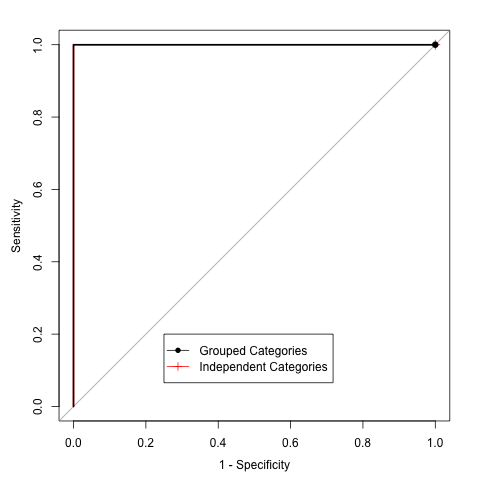

In [25]:
%%R

set.seed(476)
treebagFactorFit <- train(x = HepTrain,
                          y = HepTrain$injury,
                          method = "treebag",
                          nbagg = 50,
                          metric = "ROC",
                          trControl = ctrl)
print(treebagFactorFit)

treebagFactorCM <- confusionMatrix(treebagFactorFit, norm = "none")
print(treebagFactorCM)

treebagFactorFit_pred_successful = (treebagFactorFit$pred$pred == treebagFactorFit$pred$obs) * 1

treebagFactorRoc <- roc(response = treebagFactorFit$pred$obs,
                        predictor = treebagFactorFit_pred_successful,
                        levels = rev(levels(treebagFactorFit$pred$obs)))


plot(rpartRoc, type = "s", col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
# plot(j48FactorRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2),
#      legacy.axes = TRUE)
plot(treebagRoc, type = "s", add = TRUE, print.thres = c(.5),
     print.thres.pch = 3, legacy.axes = TRUE, print.thres.pattern = "",
     print.thres.cex = 1.2,
     col = "red", print.thres.col = "red")
plot(treebagFactorRoc, type = "s", add = TRUE, print.thres = c(.5),
     print.thres.pch = 16, print.thres.pattern = "", legacy.axes = TRUE,
     print.thres.cex = 1.2)
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))


## Section 14.4 Random Forests

In [ ]:
%%R

### For the book, this model was run with only 500 trees (by
### accident). More than 1000 trees usually required to get consistent
### results.

mtryValues <- c(5, 10, 20, 32, 50, 100, 250, 500, 1000)
set.seed(476)
rfFit <- train(x = HepTrain,
               y = HepTrain$injury,
               method = "rf",
               ntree = 500,
               tuneGrid = data.frame(mtry = mtryValues),
               importance = TRUE,
               metric = "ROC",
               trControl = ctrl)

In [27]:
%%R

print(rfFit)

rfCM <- confusionMatrix(rfFit, norm = "none")
print(rfCM)

rfFit_pred_successful = (rfFit$pred$pred == rfFit$pred$obs) * 1

rfRoc <- roc(response = rfFit$pred$obs,
             predictor = rfFit_pred_successful,
             levels = rev(levels(rfFit$pred$obs)))

print(gc())

Random Forest 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  mtry  Accuracy   Kappa      Accuracy SD  Kappa SD  
     5  0.6721429  0.3818359  0.04400738   0.08413705
    10  0.7378571  0.5105948  0.04990425   0.09636136
    20  0.8357143  0.6974908  0.03534030   0.06663959
    32  0.8928571  0.8066265  0.03049688   0.05587040
    50  0.9292857  0.8743680  0.02497873   0.04545882
   100  0.9935714  0.9888791  0.01015400   0.01762976
   250  1.0000000  1.0000000  0.00000000   0.00000000
   500  1.0000000  1.0000000  0.00000000   0.00000000
  1000  1.0000000  1.0000000  0.00000000   0.00000000

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 250. 
Repeated Train/Test Splits Estimated (25 reps, 0.75%) Confu

In [31]:
%%R

# ## The randomForest package cannot handle factors with more than 32
# ## levels, so we make a new set of predictors where the sponsor code
# ## factor is entered as dummy variables instead of a single factor.
# 
# sponsorVars <- grep("Sponsor", names(training), value = TRUE)
# sponsorVars <- sponsorVars[sponsorVars != "SponsorCode"]
# 
# rfPredictors <- factorPredictors
# rfPredictors <- rfPredictors[rfPredictors != "SponsorCode"]
# rfPredictors <- c(rfPredictors, sponsorVars)

set.seed(476)
rfFactorFit <- train(x = HepTrain, ###   [,rfPredictors],
                     y = HepTrain$injury,
                     method = "rf",
                     ntree = 100,  ##############################  1500,
                     tuneGrid = data.frame(mtry = mtryValues),
                     importance = TRUE,
                     metric = "ROC",
                     trControl = ctrl)
print(rfFactorFit)

rfFactorCM <- confusionMatrix(rfFactorFit, norm = "none")
print(rfFactorCM)

rfFactorFit_pred_successful = (rfFactorFit$pred$pred == rfFactorFit$pred$obs) * 1

rfFactorRoc <- roc(response = rfFactorFit$pred$obs,
                   predictor = rfFactorFit_pred_successful,
                   levels = rev(levels(rfFactorFit$pred$obs)))


Random Forest 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  mtry  Accuracy   Kappa      Accuracy SD  Kappa SD  
     5  0.6528571  0.3461053  0.06166104   0.11511444
    10  0.7385714  0.5127669  0.04968010   0.09271023
    20  0.8242857  0.6772069  0.03915020   0.07292891
    32  0.8857143  0.7939775  0.03300755   0.06089176
    50  0.9278571  0.8719289  0.02389123   0.04292123
   100  0.9921429  0.9863740  0.01371633   0.02385579
   250  1.0000000  1.0000000  0.00000000   0.00000000
   500  1.0000000  1.0000000  0.00000000   0.00000000
  1000  1.0000000  1.0000000  0.00000000   0.00000000

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 250. 
Repeated Train/Test Splits Estimated (25 reps, 0.75%) Confu

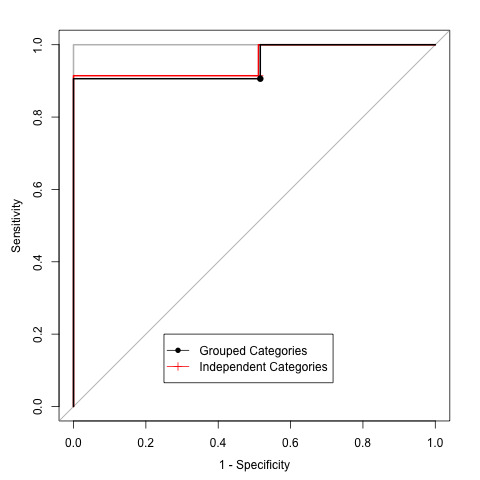

In [32]:
%%R

plot(treebagRoc, type = "s", col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
plot(rpartRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
# plot(j48FactorRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2),
#      legacy.axes = TRUE)
plot(rfRoc, type = "s", add = TRUE, print.thres = c(.5),
     print.thres.pch = 3, legacy.axes = TRUE, print.thres.pattern = "",
     print.thres.cex = 1.2,
     col = "red", print.thres.col = "red")
plot(rfFactorRoc, type = "s", add = TRUE, print.thres = c(.5),
     print.thres.pch = 16, print.thres.pattern = "", legacy.axes = TRUE,
     print.thres.cex = 1.2)
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))


## Section 14.5 Boosting


In [33]:
%%R

gbmGrid <- expand.grid(interaction.depth = c(1, 3, 5, 7, 9),
                       n.trees = (1:3) * 100, #################  n.trees = (1:20)*100,
                       shrinkage = c(.01, .1))

set.seed(476)
gbmFit <- train(x = HepTrain,
                y = HepTrain$injury,
                method = "gbm",
                tuneGrid = gbmGrid,
                metric = "ROC",
                verbose = FALSE,
                trControl = ctrl)
print(gbmFit)

gbmFit$pred <- merge(gbmFit$pred,  gbmFit$bestTune)
gbmCM <- confusionMatrix(gbmFit, norm = "none")
print(gbmCM)

gbmFit_pred_successful = (gbmFit$pred$pred == gbmFit$pred$obs) * 1

gbmRoc <- roc(response = gbmFit$pred$obs,
              predictor = gbmFit_pred_successful,
              levels = rev(levels(gbmFit$pred$obs)))


Loading required package: gbm
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loaded gbm 2.1.1
Stochastic Gradient Boosting 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy  Kappa  Accuracy SD  Kappa SD
  0.01       1                  100      1         1      0            0       
  0.01       1                  200      1         1      0            0       
  0.01       1                  300      1         1      0            0       
  0.01       3                  100      1         1      0            0       
  0.01       3                  200      1         1      0            0       
  0.01       3

In [ ]:
%%R

set.seed(476)
gbmFactorFit <- train(x = HepTrain, ### [,factorPredictors],
                      y = HepTrain$injury,
                      method = "gbm",
                      tuneGrid = gbmGrid,
                      verbose = FALSE,
                      metric = "ROC",
                      trControl = ctrl)

In [36]:
%%R
print(gbmFactorFit)

gbmFactorFit$pred <- merge(gbmFactorFit$pred,  gbmFactorFit$bestTune)
gbmFactorCM <- confusionMatrix(gbmFactorFit, norm = "none")
print(gbmFactorCM)

Error in valid.viewport(x, y, width, height, just, gp, clip, xscale, yscale,  : 
  invalid 'yscale' in viewport
In addition: There were 50 or more warnings (use warnings() to see the first 50)
Stochastic Gradient Boosting 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy  Kappa  Accuracy SD  Kappa SD
  0.01       1                  100      1         1      0            0       
  0.01       1                  200      1         1      0            0       
  0.01       1                  300      1         1      0            0       
  0.01       3                  100      1         1      0            0       
  0.01       3                  200      1         1      0            0       
  0.01       3                  300 

In [37]:
%%R

print(warnings())

Warning messages:
1: In train.default(x = HepTrain, y = HepTrain$injury, method = "gbm",  ... :
  The metric "ROC" was not in the result set. Accuracy will be used instead.
2: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 9: X9 has no variation.
3: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 10: X10 has no variation.
4: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 79: X79 has no variation.
5: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 100: X100 has no variation.
6: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 108: X108 has no variation.
7: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 114: X114 has no variation.
8: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 163: X163 has no variation.
9: In gbm.fit(x = structure(list(X1 = c(0, 0, 0, 0, 0, 0,  ... :
  variable 241: Z49 has no variation.
10: 

In [38]:
%%R

gbmFactorFit_pred_successful = (gbmFactorFit$pred$pred == gbmFactorFit$pred$obs) * 1

gbmFactorRoc <- roc(response = gbmFactorFit$pred$obs,
                    predictor = gbmFactorFit_pred_successful,
                    levels = rev(levels(gbmFactorFit$pred$obs)))

gbmROCRange <- extendrange(cbind(gbmFactorFit$results$ROC,gbmFit$results$ROC))

plot(gbmFactorFit, ylim = gbmROCRange,
     auto.key = list(columns = 4, lines = TRUE))

plot(gbmFit, ylim = gbmROCRange,
     auto.key = list(columns = 4, lines = TRUE))

RRuntimeError: Error in valid.viewport(x, y, width, height, just, gp, clip, xscale, yscale,  : 
  invalid 'yscale' in viewport


Error in valid.viewport(x, y, width, height, just, gp, clip, xscale, yscale,  : 
  invalid 'yscale' in viewport
In addition: Warning messages:
1: In min(x, na.rm = na.rm) :
  no non-missing arguments to min; returning Inf
2: In max(x, na.rm = na.rm) :
  no non-missing arguments to max; returning -Inf
3: In draw.key(simpleKey(...), draw = FALSE) : not enough rows for columns

Call:
roc.default(response = rfFactorFit$pred$obs, predictor = rfFactorFit_pred_successful,     levels = rev(levels(rfFactorFit$pred$obs)))

Data: rfFactorFit_pred_successful in 1350 controls (rfFactorFit$pred$obs Severe) < 4725 cases (rfFactorFit$pred$obs None).
Area under the curve: 0.6949


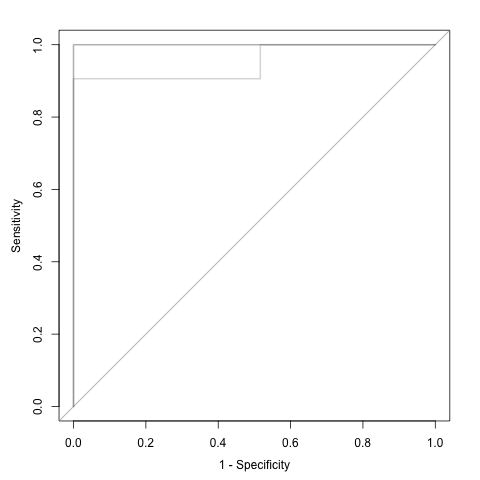

In [39]:
%%R

plot(treebagRoc, type = "s", col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
plot(rpartRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
## plot(j48FactorRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
plot(rfFactorRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
# plot(gbmRoc, type = "s", print.thres = c(.5), print.thres.pch = 3,
#     print.thres.pattern = "", print.thres.cex = 1.2,
#      add = TRUE, col = "red", print.thres.col = "red", legacy.axes = TRUE)
# plot(gbmFactorRoc, type = "s", print.thres = c(.5), print.thres.pch = 16,
#      legacy.axes = TRUE, print.thres.pattern = "", print.thres.cex = 1.2,
#      add = TRUE)


## Section 14.5 C5.0

In [42]:
%%R

c50Grid <- expand.grid(trials = c(1,3,5,7,9,10),
                       #### trials = c(1:9, (1:10)*10),
                       model = c("tree", "rules"),
                       winnow = c(TRUE, FALSE))
set.seed(476)
c50FactorFit <- train(HepTrain, HepTrain$injury,
                      method = "C5.0",
                      tuneGrid = c50Grid,
                      verbose = FALSE,
                      metric = "ROC",
                      trControl = ctrl)
print(c50FactorFit)

c50FactorFit$pred <- merge(c50FactorFit$pred,  c50FactorFit$bestTune)
c50FactorCM <- confusionMatrix(c50FactorFit, norm = "none")
print(c50FactorCM)

c50FactorFit_pred_successful = (c50FactorFit$pred$pred == c50FactorFit$pred$obs) * 1

c50FactorRoc <- roc(response = c50FactorFit$pred$obs,
                    predictor = c50FactorFit_pred_successful,
                    levels = rev(levels(c50FactorFit$pred$obs)))


C5.0 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  model  winnow  trials  Accuracy  Kappa  Accuracy SD  Kappa SD
  rules  FALSE    1      1         1      0            0       
  rules  FALSE    3      1         1      0            0       
  rules  FALSE    5      1         1      0            0       
  rules  FALSE    7      1         1      0            0       
  rules  FALSE    9      1         1      0            0       
  rules  FALSE   10      1         1      0            0       
  rules   TRUE    1      1         1      0            0       
  rules   TRUE    3      1         1      0            0       
  rules   TRUE    5      1         1      0            0       
  rules   TRUE    7      1         1      0            0       
  rules   TRUE    9      1   

In [ ]:
%%R

set.seed(476)
c50Fit <- train(HepTrain, HepTrain$injury,
                method = "C5.0",
                tuneGrid = c50Grid,
                metric = "ROC",
                verbose = FALSE,
                trControl = ctrl)

In [45]:
%%R

print(c50Fit)

c50Fit$pred <- merge(c50Fit$pred,  c50Fit$bestTune)
c50CM <- confusionMatrix(c50Fit, norm = "none")
print(c50CM)

c50Fit_pred_successful = (c50Fit$pred$pred == c50Fit$pred$obs) * 1

c50Roc <- roc(response = c50Fit$pred$obs,
              predictor = c50Fit_pred_successful,
              levels = rev(levels(c50Fit$pred$obs)))


C5.0 

225 samples
377 predictors
  3 classes: 'Mild', 'None', 'Severe' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (25 reps, 0.75%) 

Summary of sample sizes: 169, 169, 169, 169, 169, 169, ... 

Resampling results across tuning parameters:

  model  winnow  trials  Accuracy  Kappa  Accuracy SD  Kappa SD
  rules  FALSE    1      1         1      0            0       
  rules  FALSE    3      1         1      0            0       
  rules  FALSE    5      1         1      0            0       
  rules  FALSE    7      1         1      0            0       
  rules  FALSE    9      1         1      0            0       
  rules  FALSE   10      1         1      0            0       
  rules   TRUE    1      1         1      0            0       
  rules   TRUE    3      1         1      0            0       
  rules   TRUE    5      1         1      0            0       
  rules   TRUE    7      1         1      0            0       
  rules   TRUE    9      1   

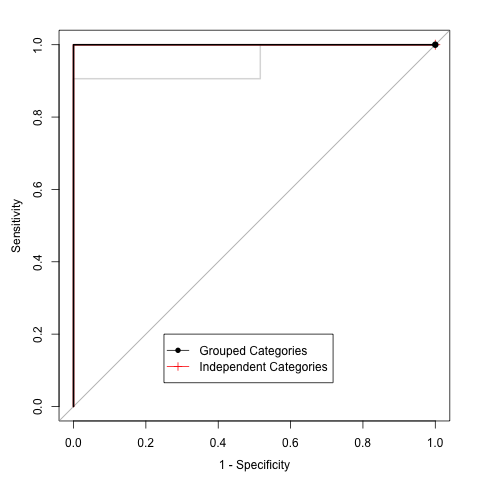

In [46]:
%%R

plot(treebagRoc, type = "s", col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
plot(rpartRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
# plot(j48FactorRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
plot(rfFactorRoc, type = "s", add = TRUE, col = rgb(.2, .2, .2, .2), legacy.axes = TRUE)
# plot(gbmRoc, type = "s",  col = rgb(.2, .2, .2, .2), add = TRUE, legacy.axes = TRUE)
plot(c50Roc, type = "s", print.thres = c(.5), print.thres.pch = 3,
     print.thres.pattern = "", print.thres.cex = 1.2,
     add = TRUE, col = "red", print.thres.col = "red", legacy.axes = TRUE)
plot(c50FactorRoc, type = "s", print.thres = c(.5), print.thres.pch = 16,
     print.thres.pattern = "", print.thres.cex = 1.2,
     add = TRUE, legacy.axes = TRUE)
legend(.75, .2,
       c("Grouped Categories", "Independent Categories"),
       lwd = c(1, 1),
       col = c("black", "red"),
       pch = c(16, 3))


## Section 14.7 Comparing Two Encodings of Categorical Predictors

In [47]:
%%R

## Pull the hold-out results from each model and merge

rp1 <- caret:::getTrainPerf(rpartFit)
names(rp1) <- gsub("Train", "Independent", names(rp1))
rp2 <- caret:::getTrainPerf(rpartFactorFit)
rp2$Label <- "CART"
names(rp2) <- gsub("Train", "Grouped", names(rp2))
rp <- cbind(rp1, rp2)

# j481 <- caret:::getTrainPerf(j48Fit)
# names(j481) <- gsub("Train", "Independent", names(j481))
# j482 <- caret:::getTrainPerf(j48FactorFit)
# j482$Label <- "J48"
# names(j482) <- gsub("Train", "Grouped", names(j482))
# j48 <- cbind(j481, j482)
# 
# part1 <- caret:::getTrainPerf(partFit)
# names(part1) <- gsub("Train", "Independent", names(part1))
# part2 <- caret:::getTrainPerf(partFactorFit)
# part2$Label <- "PART"
# names(part2) <- gsub("Train", "Grouped", names(part2))
# part <- cbind(part1, part2)

tb1 <- caret:::getTrainPerf(treebagFit)
names(tb1) <- gsub("Train", "Independent", names(tb1))
tb2 <- caret:::getTrainPerf(treebagFactorFit)
tb2$Label <- "Bagged Tree"
names(tb2) <- gsub("Train", "Grouped", names(tb2))
tb <- cbind(tb1, tb2)

rf1 <- caret:::getTrainPerf(rfFit)
names(rf1) <- gsub("Train", "Independent", names(rf1))
rf2 <- caret:::getTrainPerf(rfFactorFit)
rf2$Label <- "Random Forest"
names(rf2) <- gsub("Train", "Grouped", names(rf2))
rf <- cbind(rf1, rf2)

# gbm1 <- caret:::getTrainPerf(gbmFit)
# names(gbm1) <- gsub("Train", "Independent", names(gbm1))
# gbm2 <- caret:::getTrainPerf(gbmFactorFit)
# gbm2$Label <- "Boosted Tree"
# names(gbm2) <- gsub("Train", "Grouped", names(gbm2))
# bst <- cbind(gbm1, gbm2)

c501 <- caret:::getTrainPerf(c50Fit)
names(c501) <- gsub("Train", "Independent", names(c501))
c502 <- caret:::getTrainPerf(c50FactorFit)
c502$Label <- "C5.0"
names(c502) <- gsub("Train", "Grouped", names(c502))
c5 <- cbind(c501, c502)


Using method, method, Label as id variables
Using method, method, Label, variable, metric, model as id variables


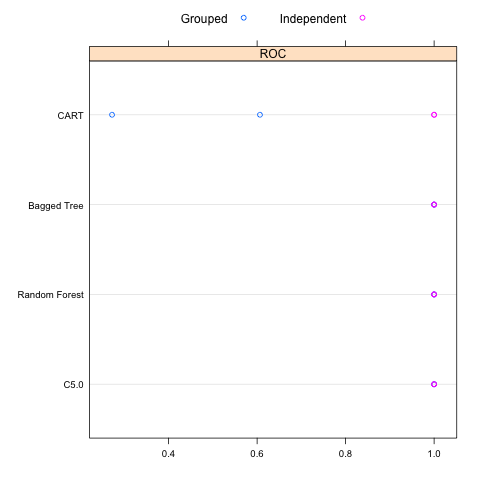

In [48]:
%%R

# trainPerf <- rbind(rp, j48, part, tb, rf, bst, c5)
trainPerf <- rbind(rp,             tb, rf,     c5)


library(lattice)
library(reshape2)

trainPerf <- melt(trainPerf)
trainPerf$metric <- "ROC"
trainPerf$metric[grepl("Sens", trainPerf$variable)] <- "Sensitivity"
trainPerf$metric[grepl("Spec", trainPerf$variable)] <- "Specificity"
trainPerf$model <- "Grouped"
trainPerf$model[grepl("Independent", trainPerf$variable)] <- "Independent"

trainPerf <- melt(trainPerf)
trainPerf$metric <- "ROC"
trainPerf$metric[grepl("Sens", trainPerf$variable)] <- "Sensitivity"
trainPerf$metric[grepl("Spec", trainPerf$variable)] <- "Specificity"
trainPerf$model <- "Independent"
trainPerf$model[grepl("Grouped", trainPerf$variable)] <- "Grouped"
trainPerf$Label <- factor(trainPerf$Label,
                          levels = rev(c("CART", "Cond. Trees",
                                         # "J48",
                                         "Ripper",
                                         # "PART",
                                         "Bagged Tree", "Random Forest",
                                         # "Boosted Tree",
                                         "C5.0")))

print(
dotplot(Label ~ value|metric,
        data = trainPerf,
        groups = model,
        horizontal = TRUE,
        auto.key = list(columns = 2),
        between = list(x = 1),
        xlab = "")
)

In [77]:
%%R -w 600 -h 600

## runChapterScript(14)

##        user     system    elapsed 
##  208496.296    776.829 209791.456 


NULL


#Chapter 16: Remedies for Severe Class Imbalance

In [66]:
%%R

# showChapterScript(16)

NULL


In [67]:
%%R

# showChapterOutput(16)

NULL


In [80]:
%%R -w 600 -h 600

## runChapterScript(16)

##        user     system    elapsed 
##  243437.520    682.066 244138.032 


NULL


#Chapter 17: Case Study -- Job Scheduling

In [68]:
%%R

# showChapterScript(17)

NULL


In [69]:
%%R

# showChapterOutput(17)

NULL


In [83]:
%%R -w 600 -h 600

## runChapterScript(17)

##       user    system   elapsed 
##  492217.97  31824.96  39801.06 

NULL


#Chapter 18: Measuring Predictor Importance

In [70]:
%%R

# showChapterScript(18)

NULL


In [71]:
%%R

# showChapterOutput(18)

NULL


In [72]:
%%R -w 600 -h 600

# runChapterScript(18)

##     user  system elapsed 
##   78.161   0.635  79.081 


NULL


## Section 18.1 Numeric Outcomes

In [49]:
%%R

## Load the solubility data

library(AppliedPredictiveModeling)
data(solubility)

trainData <- solTrainXtrans
trainData$y <- solTrainY

## keep the continuous predictors and append the outcome to the data frame
SolContPred <- solTrainXtrans[, !grepl("FP", names(solTrainXtrans))]
numSolPred <- ncol(SolContPred)
SolContPred$Sol <- solTrainY

## Get the LOESS smoother and the summary measure

library(caret)
smoother <- filterVarImp(x = SolContPred[, -ncol(SolContPred)],
                         y = solTrainY,
                         nonpara = TRUE)
smoother$Predictor <- rownames(smoother)
names(smoother)[1] <- "Smoother"

## Calculate the correlation matrices and keep the columns with the correlations
## between the predictors and the outcome

correlations <- cor(SolContPred)[-(numSolPred+1),(numSolPred+1)]
rankCorrelations <- cor(SolContPred, method = "spearman")[-(numSolPred+1),(numSolPred+1)]

corrs <- data.frame(Predictor = names(SolContPred)[1:numSolPred],
                    Correlation = correlations,
                    RankCorrelation  = rankCorrelations)


In [50]:
%%R

## The maximal information coefficient (MIC) values can be obtained from the
### minerva package:

library(minerva)
MIC <- mine(x = SolContPred[, 1:numSolPred], y = solTrainY)$MIC
MIC <- data.frame(Predictor = rownames(MIC),
                  MIC = MIC[,1])


In [51]:
%%R

## The Relief values for regression can be computed using the CORElearn
## package:

library(CORElearn)
ReliefF <- attrEval(Sol ~ .,  data = SolContPred,
                    estimator = "RReliefFequalK")
ReliefF <- data.frame(Predictor = names(ReliefF),
                  Relief = ReliefF)


                          Predictor    Smoother Correlation RankCorrelation
HydrophilicFactor HydrophilicFactor 0.184455208  0.38598321      0.36469127
MolWeight                 MolWeight 0.444393085 -0.65852844     -0.68529880
NumAromaticBonds   NumAromaticBonds 0.168645461 -0.41066466     -0.45787109
NumAtoms                   NumAtoms 0.189931478 -0.43581129     -0.51983173
NumBonds                   NumBonds 0.210717251 -0.45903949     -0.54839850
NumCarbon                 NumCarbon 0.368196173 -0.60679170     -0.67359114
NumChlorine             NumChlorine 0.158529031 -0.39815704     -0.35707519
NumDblBonds             NumDblBonds 0.002409996  0.04909171     -0.02042731
NumHalogen               NumHalogen 0.157187646 -0.39646897     -0.38111965
NumHydrogen             NumHydrogen 0.022654223 -0.15051320     -0.25592586
NumMultBonds           NumMultBonds 0.230799468 -0.48041593     -0.47971353
NumNitrogen             NumNitrogen 0.026032871  0.16134705      0.10078218
NumNonHAtoms

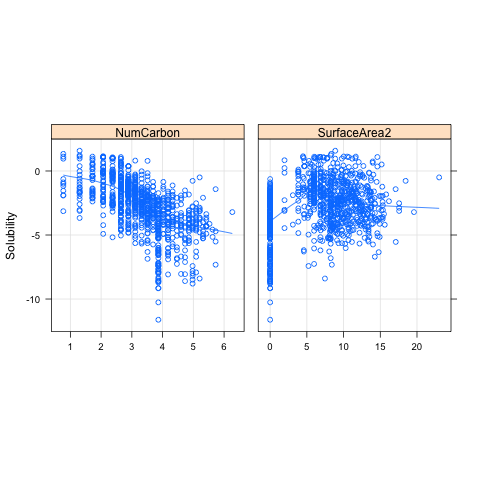

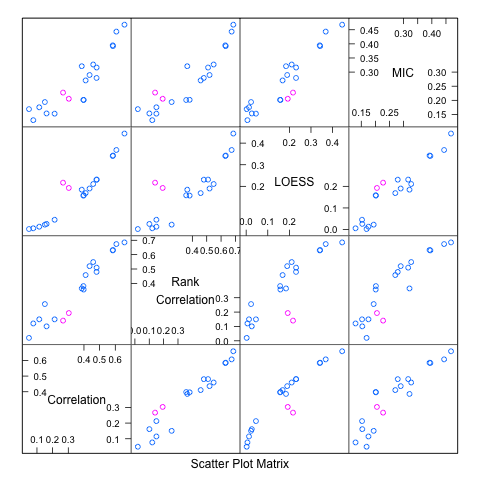

In [52]:
%%R

## Combine them all together for a plot
contDescrScores <- merge(smoother, corrs)
contDescrScores <- merge(contDescrScores, MIC)
contDescrScores <- merge(contDescrScores, ReliefF)

rownames(contDescrScores) <- contDescrScores$Predictor

print(contDescrScores)

contDescrSplomData <- contDescrScores
contDescrSplomData$Correlation <- abs(contDescrSplomData$Correlation)
contDescrSplomData$RankCorrelation <- abs(contDescrSplomData$RankCorrelation)
contDescrSplomData$Group <- "Other"
contDescrSplomData$Group[grepl("Surface", contDescrSplomData$Predictor)] <- "SA"

print(
featurePlot(solTrainXtrans[, c("NumCarbon", "SurfaceArea2")],
            solTrainY,
            between = list(x = 1),
            type = c("g", "p", "smooth"),
            df = 3,
            aspect = 1,
            labels = c("", "Solubility"))
)

print(
splom(~contDescrSplomData[,c(3, 4, 2, 5)],
      groups = contDescrSplomData$Group,
      varnames = c("Correlation", "Rank\nCorrelation", "LOESS", "MIC"))
)


In [54]:
%%R

## Now look at the categorical (i.e. binary) predictors
SolCatPred <- solTrainXtrans[, grepl("FP", names(solTrainXtrans))]
SolCatPred$Sol <- solTrainY
numSolCatPred <- ncol(SolCatPred) - 1

tests <- apply(SolCatPred[, 1:numSolCatPred], 2,
                  function(x, y)
                    {
                    tStats <- t.test(y ~ x)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = solTrainY)

## The results are a matrix with predictors in columns. We reverse this
tests <- as.data.frame(t(tests))
names(tests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
tests$difference <- tests$mean1 - tests$mean0

print(tests)

      t.Statistic t.test_p.value     mean0     mean1   difference
FP001 -4.02204024   6.287404e-05 -2.978465 -2.451471  0.526993515
FP002 10.28672686   1.351580e-23 -2.021347 -3.313860 -1.292512617
FP003 -2.03644225   4.198619e-02 -2.832164 -2.571855  0.260308757
FP004 -4.94895770   9.551772e-07 -3.128380 -2.427428  0.700951689
FP005 10.28247538   1.576549e-23 -1.969000 -3.262722 -1.293722323
FP006 -7.87583806   9.287835e-15 -3.109421 -2.133832  0.975589032
FP007 -0.88733923   3.751398e-01 -2.759967 -2.646185  0.113781971
FP008  3.32843788   9.119521e-04 -2.582652 -2.999613 -0.416960797
FP009 11.49360533   7.467714e-27 -2.249591 -3.926278 -1.676686955
FP010 -4.11392307   4.973603e-05 -2.824302 -2.232824  0.591478647
FP011 -7.01680213   1.067782e-11 -2.934645 -1.927353  1.007292306
FP012 -1.89255407   5.953582e-02 -2.773755 -2.461369  0.312385742
FP013 11.73267872   1.088092e-24 -2.365485 -4.490696 -2.125210704
FP014 11.47456176   1.157457e-23 -2.375401 -4.508431 -2.133030370
FP015 -7.7

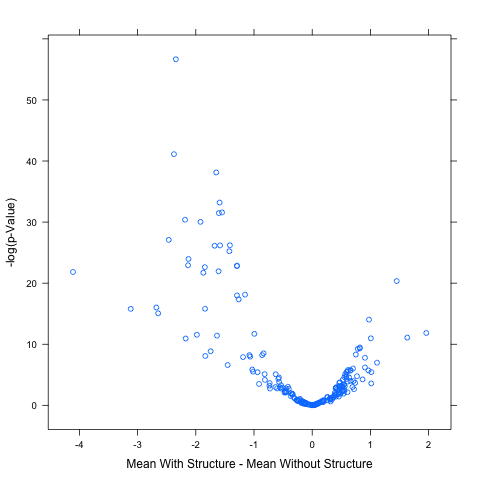

In [55]:
%%R

## Create a volcano plot

xyplot(-log10(t.test_p.value) ~ difference,
       data = tests,
       xlab = "Mean With Structure - Mean Without Structure",
       ylab = "-log(p-Value)",
       type = "p")

##Section 18.2: Categorical Outcomes

In [58]:
%%R

## Load the segmentation data

data(segmentationData)
segTrain <- subset(segmentationData, Case == "Train")
segTrain$Case <- segTrain$Cell <- NULL

segTest <- subset(segmentationData, Case != "Train")
segTest$Case <- segTest$Cell <- NULL

## Compute the areas under the ROC curve
aucVals <- filterVarImp(x = segTrain[, -1], y = segTrain$Class)
aucVals$Predictor <- rownames(aucVals)

## Cacluate the t-tests as before but with x and y switched
segTests <- apply(segTrain[, -1], 2,
                  function(x, y)
                    {
                    tStats <- t.test(x ~ y)[c("statistic", "p.value", "estimate")]
                    unlist(tStats)
                    },
               y = segTrain$Class)

segTests <- as.data.frame(t(segTests))
names(segTests) <- c("t.Statistic", "t.test_p.value", "mean0", "mean1")
segTests$Predictor <- rownames(segTests)


In [59]:
%%R

## Fit a random forest model and get the importance scores
library(randomForest)

set.seed(791)
rfImp <- randomForest(Class ~ ., data = segTrain,
                      ntree = 2000,
                      importance = TRUE)
rfValues <- data.frame(RF = importance(rfImp)[, "MeanDecreaseGini"],
                       Predictor = rownames(importance(rfImp)))

## Now compute the Relief scores
set.seed(791)

ReliefValues <- attrEval(Class ~ ., data = segTrain,
                         estimator="ReliefFequalK", ReliefIterations = 50)
ReliefValues <- data.frame(Relief = ReliefValues,
                           Predictor = names(ReliefValues))

## and the MIC statistics
set.seed(791)
segMIC <- mine(x = segTrain[, -1],
               ## Pass the outcome as 0/1
               y = ifelse(segTrain$Class == "PS", 1, 0))$MIC
segMIC <- data.frame(Predictor = rownames(segMIC),
                  MIC = segMIC[,1])

rankings <- merge(segMIC, ReliefValues)
rankings <- merge(rankings, rfValues)
rankings <- merge(rankings, segTests)
rankings <- merge(rankings, aucVals)
print(rankings)


                 Predictor         MIC       Relief        RF  t.Statistic
1                 AngleCh1 0.131057008  0.002287557  4.730963  -0.21869850
2                  AreaCh1 0.108083908  0.016041257  4.315317  -0.93160658
3              AvgIntenCh1 0.292046076  0.071057681 18.865802 -11.75400848
4              AvgIntenCh2 0.329484594  0.150684824 21.857848 -16.09400822
5              AvgIntenCh3 0.135443794  0.018172519  5.135363  -0.14752973
6              AvgIntenCh4 0.166545039 -0.007167866  5.434737  -6.23725001
7   ConvexHullAreaRatioCh1 0.299627157  0.035983697 19.093048  14.22756193
8  ConvexHullPerimRatioCh1 0.254931744  0.041865999 12.624038 -13.86697029
9      DiffIntenDensityCh1 0.239224382  0.038582763  7.335741  -9.81721615
10     DiffIntenDensityCh3 0.133084659  0.010830941  6.647198   1.48785690
11     DiffIntenDensityCh4 0.147643832  0.042352546  5.386981  -5.54840221
12         EntropyIntenCh1 0.261097110  0.129280729 13.867582 -14.04326173
13         EntropyIntenCh

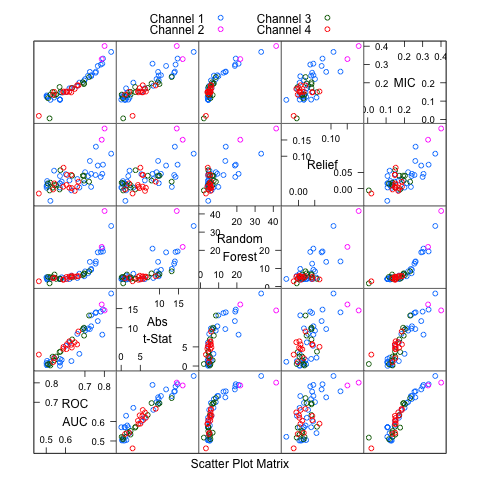

In [60]:
%%R

rankings$channel <- "Channel 1"
rankings$channel[grepl("Ch2$", rankings$Predictor)] <- "Channel 2"
rankings$channel[grepl("Ch3$", rankings$Predictor)] <- "Channel 3"
rankings$channel[grepl("Ch4$", rankings$Predictor)] <- "Channel 4"
rankings$t.Statistic <- abs(rankings$t.Statistic)

print(
splom(~rankings[, c("PS", "t.Statistic", "RF", "Relief", "MIC")],
      groups = rankings$channel,
      varnames = c("ROC\nAUC", "Abs\nt-Stat", "Random\nForest", "Relief", "MIC"),
      auto.key = list(columns = 2))
)

In [ ]:
%%R

HAVE_GRANT_DATA = FALSE

if (HAVE_GRANT_DATA) {  # the dataset is at Kaggle

## Load the grant data. A script to create and save these data is contained
## in the same directory as this file.

load("grantData.RData")

dataSubset <- training[pre2008, c("Sponsor62B", "ContractValueBandUnk", "RFCD240302")]

## This is a simple function to compute several statistics for binary predictors
tableCalcs <- function(x, y)
  {
  tab <- table(x, y)
  fet <- fisher.test(tab)
  out <- c(OR = fet$estimate,
           P = fet$p.value,
           Gain = attrEval(y ~ x, estimator = "GainRatio"))
  }

## lapply() is used to execute the function on each column
tableResults <- lapply(dataSubset, tableCalcs, y = training[pre2008, "Class"])

## The results come back as a list of vectors, and "rbind" is used to join
## then together as rows of a table
tableResults <- do.call("rbind", tableResults)
print(tableResults)

## The permuted Relief scores can be computed using a function from the
## AppliedPredictiveModeling package.

permuted <- permuteRelief(x = training[pre2008, c("Sponsor62B", "Day", "NumCI")],
                          y = training[pre2008, "Class"],
                          nperm = 500,
                          ### the remaining options are passed to attrEval()
                          estimator="ReliefFequalK",
                          ReliefIterations= 50)

## The original Relief scores:
print(permuted$observed)

## The number of standard deviations away from the permuted mean:
print(permuted$standardized)

## The distributions of the scores if there were no relationship between the
## predictors and outcomes

histogram(~value|Predictor,
          data = permuted$permutations,
          xlim = extendrange(permuted$permutations$value),
          xlab = "Relief Score")
    
}


#Chapter 19: An Introduction to Feature Selection

In [73]:
%%R

# showChapterScript(19)

NULL


In [74]:
%%R

# showChapterOutput(19)

NULL


In [ ]:
%%R -w 600 -h 600

## runChapterScript(19)

##       user     system    elapsed 
## 257587.585   7078.267  35323.717 


## Section 19.6 Case Study: Predicting Cognitive Impairment

In [ ]:
%%R

library(AppliedPredictiveModeling)
data(AlzheimerDisease)

## The baseline set of predictors
bl <- c("Genotype", "age", "tau", "p_tau", "Ab_42", "male")

## The set of new assays
newAssays <- colnames(predictors)
newAssays <- newAssays[!(newAssays %in% c("Class", bl))]

## Decompose the genotype factor into binary dummy variables

predictors$E2 <- predictors$E3 <- predictors$E4 <- 0
predictors$E2[grepl("2", predictors$Genotype)] <- 1
predictors$E3[grepl("3", predictors$Genotype)] <- 1
predictors$E4[grepl("4", predictors$Genotype)] <- 1
genotype <-  predictors$Genotype


In [ ]:
%%R

## Partition the data
library(caret)
set.seed(730)

split <- createDataPartition(diagnosis, p = .8, list = FALSE)

adData <- predictors
adData$Class <- diagnosis

training <- adData[ split, ]
testing  <- adData[-split, ]


In [ ]:
%%R

predVars <- names(adData)[!(names(adData) %in% c("Class",  "Genotype"))]

## This summary function is used to evaluate the models.
fiveStats <- function(...) c(twoClassSummary(...), defaultSummary(...))

## We create the cross-validation files as a list to use with different
## functions

set.seed(104)
index <- createMultiFolds(training$Class, times = 5)

## The candidate set of the number of predictors to evaluate
varSeq <- seq(1, length(predVars)-1, by = 2)


In [61]:
%%R

## We can also use parallel processing to run each resampled RFE
## iteration (or resampled model with train()) using different
## workers.

### library(doMC)
### registerDoMC(15)

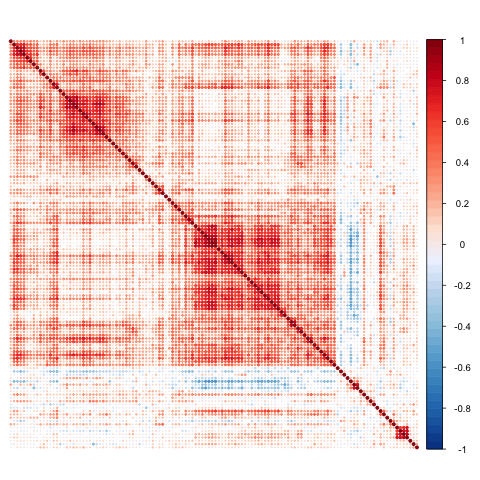

In [64]:
%%R

## The rfe() function in the caret package is used for recursive feature
## elimination. We setup control functions for this and train() that use
## the same cross-validation folds. The 'ctrl' object will be modifed several
## times as we try different models

ctrl <- rfeControl(method = "repeatedcv", repeats = 5,
                   saveDetails = TRUE,
                   index = index,
                   returnResamp = "final")

fullCtrl <- trainControl(method = "repeatedcv",
                         repeats = 5,
                         summaryFunction = fiveStats,
                         classProbs = TRUE,
                         index = index)

## The correlation matrix of the new data

predCor <- cor(training[, newAssays])

library(RColorBrewer)
cols <- c(rev(brewer.pal(7, "Blues")),
          brewer.pal(7, "Reds"))

library(corrplot)

corrplot(predCor,
         order = "hclust",
         tl.pos = "n",addgrid.col = rgb(1,1,1,.01),
         col = colorRampPalette(cols)(51))


In [65]:
%%R

## Fit a series of models with the full set of predictors
set.seed(721)
rfFull <- train(training[, predVars],
                training$Class,
                method = "rf",
                metric = "ROC",
                tuneGrid = data.frame(mtry = floor(sqrt(length(predVars)))),
                ntree = 100, ### 1000,
                trControl = fullCtrl)
print(rfFull)


Random Forest 

267 samples
132 predictors
  2 classes: 'Impaired', 'Control' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 241, 241, 241, 240, 240, 240, ... 

Resampling results

  ROC        Sens       Spec       Accuracy  Kappa      ROC SD      Sens SD  
  0.8789873  0.4303571  0.9804737  0.83      0.4826618  0.07375014  0.1499796
  Spec SD     Accuracy SD  Kappa SD 
  0.03104221  0.04727362   0.1643061

Tuning parameter 'mtry' was held constant at a value of 11
 


In [66]:
%%R

set.seed(721)
ldaFull <- train(training[, predVars],
                 training$Class,
                 method = "lda",
                 metric = "ROC",
                 ## The 'tol' argument helps lda() know when a matrix is
                 ## singular. One of the predictors has values very close to
                 ## zero, so we raise the vaue to be smaller than the default
                 ## value of 1.0e-4.
                 tol = 1.0e-12,
                 trControl = fullCtrl)
print(ldaFull)


Linear Discriminant Analysis 

267 samples
132 predictors
  2 classes: 'Impaired', 'Control' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 241, 241, 241, 240, 240, 240, ... 

Resampling results

  ROC        Sens       Spec       Accuracy   Kappa      ROC SD      Sens SD  
  0.8438665  0.6857143  0.8294211  0.7899735  0.4909981  0.08592999  0.1803122
  Spec SD     Accuracy SD  Kappa SD 
  0.08189052  0.06588559   0.1611271

 


In [67]:
%%R

set.seed(721)
svmFull <- train(training[, predVars],
                 training$Class,
                 method = "svmRadial",
                 metric = "ROC",
                 tuneLength = 12,
                 preProc = c("center", "scale"),
                 trControl = fullCtrl)
print(svmFull)


Support Vector Machines with Radial Basis Function Kernel 

267 samples
132 predictors
  2 classes: 'Impaired', 'Control' 

Pre-processing: centered, scaled 
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 241, 241, 241, 240, 240, 240, ... 

Resampling results across tuning parameters:

  C       ROC        Sens       Spec       Accuracy   Kappa      ROC SD    
    0.25  0.8785508  0.7307143  0.9001579  0.8534514  0.6318758  0.08064140
    0.50  0.8785508  0.7382143  0.8951053  0.8519414  0.6302847  0.08064140
    1.00  0.8846485  0.7025000  0.9260000  0.8647375  0.6476011  0.07942853
    2.00  0.8919934  0.6989286  0.9310526  0.8674786  0.6505034  0.07661212
    4.00  0.8863628  0.6817857  0.9312105  0.8630322  0.6363113  0.07619876
    8.00  0.8804041  0.6546429  0.9250526  0.8511213  0.6043574  0.07639639
   16.00  0.8805733  0.6467857  0.9260526  0.8495828  0.5990336  0.07599855
   32.00  0.8805733  0.6553571  0.9230000  0.8496378  0.6011568  0.07

In [68]:
%%R

set.seed(721)
nbFull <- train(training[, predVars],
                training$Class,
                method = "nb",
                metric = "ROC",
                trControl = fullCtrl)
print(nbFull)


Loading required package: klaR
Naive Bayes 

267 samples
132 predictors
  2 classes: 'Impaired', 'Control' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 241, 241, 241, 240, 240, 240, ... 

Resampling results across tuning parameters:

  usekernel  ROC        Sens       Spec       Accuracy   Kappa      ROC SD    
  FALSE      0.7783759  0.6439286  0.7797895  0.7423260  0.3945587  0.10684380
   TRUE      0.7980028  0.5935714  0.8138947  0.7530037  0.3965766  0.09521782
  Sens SD    Spec SD     Accuracy SD  Kappa SD
  0.1731468  0.09305622  0.06992224   0.154828
  0.1742016  0.09705954  0.07924230   0.182132

Tuning parameter 'fL' was held constant at a value of 0
ROC was used to select the optimal model using  the largest value.
The final values used for the model were fL = 0 and usekernel = TRUE. 


In [69]:
%%R

lrFull <- train(training[, predVars],
                training$Class,
                method = "glm",
                metric = "ROC",
                trControl = fullCtrl)
print(lrFull)


Generalized Linear Model 

267 samples
132 predictors
  2 classes: 'Impaired', 'Control' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 241, 241, 241, 240, 240, 240, ... 

Resampling results

  ROC      Sens       Spec       Accuracy   Kappa      ROC SD     Sens SD  
  0.78464  0.6696429  0.7778947  0.7478022  0.4169576  0.1005659  0.1651773
  Spec SD    Accuracy SD  Kappa SD 
  0.1098915  0.08250065   0.1718485

 


In [70]:
%%R

set.seed(721)
knnFull <- train(training[, predVars],
                 training$Class,
                 method = "knn",
                 metric = "ROC",
                 tuneLength = 20,
                 preProc = c("center", "scale"),
                 trControl = fullCtrl)
print(knnFull)


k-Nearest Neighbors 

267 samples
132 predictors
  2 classes: 'Impaired', 'Control' 

Pre-processing: centered, scaled 
Resampling: Cross-Validated (10 fold, repeated 5 times) 

Summary of sample sizes: 241, 241, 241, 240, 240, 240, ... 

Resampling results across tuning parameters:

  k   ROC        Sens        Spec       Accuracy   Kappa       ROC SD    
   5  0.7534182  0.47607143  0.9278947  0.8041331  0.44383517  0.14226409
   7  0.7596020  0.45535714  0.9404737  0.8073525  0.44529229  0.13564347
   9  0.7875663  0.39142857  0.9629474  0.8064245  0.41435555  0.10723445
  11  0.7943938  0.36928571  0.9731579  0.8078185  0.40841677  0.11355992
  13  0.7895611  0.33571429  0.9670000  0.7942287  0.36197789  0.14035356
  15  0.8165381  0.32750000  0.9671053  0.7920879  0.35329461  0.07532207
  17  0.8208571  0.29750000  0.9794211  0.7928612  0.33791496  0.07359456
  19  0.8369497  0.28178571  0.9856842  0.7928592  0.32809108  0.07036402
  21  0.8470540  0.26500000  0.9845789  0.7875275

In [71]:
%%R

## Now fit the RFE versions. To do this, the 'functions' argument of the rfe()
## object is modified to the approproate functions. For model details about
## these functions and their arguments, see
##
##   http://caret.r-forge.r-project.org/featureSelection.html
##
## for more information.

ctrl$functions <- rfFuncs
ctrl$functions$summary <- fiveStats

set.seed(721)
rfRFE <- rfe(training[, predVars],
             training$Class,
             sizes = varSeq,
             metric = "ROC",
             ntree = 100, ### 1000,
             rfeControl = ctrl)
print(rfRFE)



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables    ROC   Sens   Spec Accuracy  Kappa   ROCSD SensSD  SpecSD
         1 0.7040 0.4846 0.7848   0.7027 0.2637 0.10847 0.1654 0.09332
         3 0.8248 0.5754 0.8865   0.8016 0.4737 0.10070 0.2037 0.06771
         5 0.8622 0.6604 0.9197   0.8488 0.5993 0.09165 0.1776 0.06346
         7 0.8800 0.6561 0.9331   0.8572 0.6141 0.07170 0.1886 0.04921
         9 0.8811 0.6425 0.9291   0.8505 0.5982 0.07663 0.1742 0.05673
        11 0.8781 0.6361 0.9311   0.8502 0.5943 0.07468 0.1891 0.05526
        13 0.8863 0.6311 0.9395   0.8549 0.6043 0.07761 0.1876 0.06083
        15 0.8818 0.6107 0.9414   0.8504 0.5860 0.07742 0.2079 0.05840
        17 0.8802 0.6339 0.9529   0.8655 0.6291 0.07615 0.1659 0.05209
        19 0.8855 0.6386 0.9476   0.8630 0.6233 0.07788 0.1841 0.05793
        21 0.8855 0.6143 0.9601   0.8652 0.6179 0.08101 0.2116 0.05078
     

In [72]:
%%R

ctrl$functions <- ldaFuncs
ctrl$functions$summary <- fiveStats

set.seed(721)
ldaRFE <- rfe(training[, predVars],
              training$Class,
              sizes = varSeq,
              metric = "ROC",
              tol = 1.0e-12,
              rfeControl = ctrl)
print(ldaRFE)



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables    ROC   Sens   Spec Accuracy  Kappa   ROCSD SensSD  SpecSD
         1 0.7529 0.4029 0.9049   0.7677 0.3405 0.09312 0.1661 0.06766
         3 0.8483 0.6621 0.8795   0.8201 0.5385 0.08787 0.2009 0.07003
         5 0.8518 0.6243 0.8899   0.8172 0.5208 0.08546 0.2032 0.06947
         7 0.8509 0.6211 0.8979   0.8216 0.5278 0.08457 0.2038 0.06042
         9 0.8517 0.6154 0.9053   0.8255 0.5341 0.08337 0.2241 0.07148
        11 0.8513 0.6264 0.9043   0.8278 0.5424 0.08574 0.2168 0.06818
        13 0.8566 0.6318 0.9176   0.8391 0.5676 0.08869 0.2132 0.06175
        15 0.8818 0.6736 0.9311   0.8603 0.6256 0.08136 0.2104 0.06389
        17 0.8872 0.6779 0.9311   0.8617 0.6298 0.07954 0.1970 0.06091
        19 0.8900 0.6729 0.9215   0.8532 0.6129 0.07704 0.1885 0.07138
        21 0.8975 0.7050 0.9289   0.8676 0.6494 0.07703 0.1940 0.05814
     

In [ ]:
%%R

ctrl$functions <- nbFuncs
ctrl$functions$summary <- fiveStats
set.seed(721)
nbRFE <- rfe(training[, predVars],
              training$Class,
              sizes = varSeq,
              metric = "ROC",
              rfeControl = ctrl)
print(nbRFE)



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables    ROC   Sens   Spec Accuracy  Kappa   ROCSD SensSD  SpecSD
         1 0.7526 0.4050 0.8980   0.7635 0.3254 0.09541 0.2090 0.07419
         3 0.8219 0.6286 0.8806   0.8112 0.5133 0.09390 0.1858 0.07246
         5 0.8260 0.6171 0.8537   0.7886 0.4655 0.08952 0.1996 0.08506
         7 0.8176 0.6200 0.8374   0.7774 0.4472 0.08568 0.1868 0.08760
         9 0.8171 0.6107 0.8355   0.7737 0.4368 0.08333 0.1784 0.08128
        11 0.8152 0.6093 0.8274   0.7672 0.4248 0.08766 0.1798 0.08402
        13 0.8197 0.6143 0.8325   0.7723 0.4370 0.08881 0.1644 0.08098
        15 0.8264 0.6532 0.8348   0.7845 0.4720 0.08559 0.1782 0.08413
        17 0.8274 0.6582 0.8325   0.7844 0.4725 0.08184 0.1732 0.07366
        19 0.8318 0.6807 0.8387   0.7950 0.5000 0.08452 0.1690 0.07622
        21 0.8314 0.6671 0.8437   0.7948 0.4955 0.08804 0.1804 0.08144
     

In [1]:
%%R

## Here, the caretFuncs list allows for a model to be tuned at each iteration
## of feature selection.

ctrl$functions <- caretFuncs
ctrl$functions$summary <- fiveStats

## This options tells train() to run its model tuning
## sequentially. Otherwise, there would be parallel processing at two
## levels, which is possible but requires W^2 workers. On our machine,
## it was more efficient to only run the RFE process in parallel.

cvCtrl <- trainControl(method = "cv",
                       verboseIter = FALSE,
                       classProbs = TRUE,
                       allowParallel = FALSE)

set.seed(721)
svmRFE <- rfe(training[, predVars],
              training$Class,
              sizes = varSeq,
              rfeControl = ctrl,
              metric = "ROC",
              ## Now arguments to train() are used.
              method = "svmRadial",
              tuneLength = 2, ########## 12,
              preProc = c("center", "scale"),
              trControl = cvCtrl)
print(svmRFE)


ERROR: Cell magic `%%R` not found.


In [ ]:
%%R

ctrl$functions <- lrFuncs
ctrl$functions$summary <- fiveStats

set.seed(721)
lrRFE <- rfe(training[, predVars],
               training$Class,
               sizes = varSeq,
               metric = "ROC",
               rfeControl = ctrl)
print(lrRFE)


In [ ]:
%%R

ctrl$functions <- caretFuncs
ctrl$functions$summary <- fiveStats

set.seed(721)
knnRFE <- rfe(training[, predVars],
              training$Class,
              sizes = varSeq,
              metric = "ROC",
              method = "knn",
              tuneLength = 3, ######### 20,
              preProc = c("center", "scale"),
              trControl = cvCtrl,
              rfeControl = ctrl)
print(knnRFE)


In [ ]:
%%R

## Each of these models can be evaluate using the plot() function to see
## the profile across subset sizes.

## Test set ROC results:
rfROCfull <- roc(testing$Class,
                 predict(rfFull, testing[,predVars], type = "prob")[,1])
print(rfROCfull)
rfROCrfe <- roc(testing$Class,
                predict(rfRFE, testing[,predVars])$Impaired)
print(rfROCrfe)


In [ ]:
%%R

ldaROCfull <- roc(testing$Class,
                  predict(ldaFull, testing[,predVars], type = "prob")[,1])
print(ldaROCfull)
ldaROCrfe <- roc(testing$Class,
                 predict(ldaRFE, testing[,predVars])$Impaired)
print(ldaROCrfe)

In [ ]:
%%R

nbROCfull <- roc(testing$Class,
                  predict(nbFull, testing[,predVars], type = "prob")[,1])
print(nbROCfull)
nbROCrfe <- roc(testing$Class,
                 predict(nbRFE, testing[,predVars])$Impaired)
print(nbROCrfe)


In [ ]:
%%R

svmROCfull <- roc(testing$Class,
                  predict(svmFull, testing[,predVars], type = "prob")[,1])
print(svmROCfull)
svmROCrfe <- roc(testing$Class,
                 predict(svmRFE, testing[,predVars])$Impaired)
print(svmROCrfe)


In [ ]:
%%R

lrROCfull <- roc(testing$Class,
                  predict(lrFull, testing[,predVars], type = "prob")[,1])
print(lrROCfull)
lrROCrfe <- roc(testing$Class,
                 predict(lrRFE, testing[,predVars])$Impaired)
print(lrROCrfe)


In [ ]:
%%R

knnROCfull <- roc(testing$Class,
                  predict(knnFull, testing[,predVars], type = "prob")[,1])
print(knnROCfull)
knnROCrfe <- roc(testing$Class,
                 predict(knnRFE, testing[,predVars])$Impaired)
print(knnROCrfe)


In [ ]:
%%R

## For filter methods, the sbf() function (named for Selection By Filter) is
## used. It has similar arguments to rfe() to control the model fitting and
## filtering methods.

## P-values are created for filtering.

## A set of four LDA models are fit based on two factors: p-value adjustment
## using a Bonferroni adjustment and whether the predictors should be
## pre-screened for high correlations.

sbfResamp <- function(x, fun = mean)
{
  x <- unlist(lapply(x$variables, length))
  fun(x)
}
sbfROC <- function(mod) auc(roc(testing$Class, predict(mod, testing)$Impaired))

## This function calculates p-values using either a t-test (when the predictor
## has 2+ distinct values) or using Fisher's Exact Test otherwise.

pScore <- function(x, y)
  {
    numX <- length(unique(x))
    if(numX > 2)
      {
       out <- t.test(x ~ y)$p.value
      } else {
       out <- fisher.test(factor(x), y)$p.value
      }
    out
  }

ldaWithPvalues <- ldaSBF
ldaWithPvalues$score <- pScore
ldaWithPvalues$summary <- fiveStats

## Predictors are retained if their p-value is less than the completely
## subjective cut-off of 0.05.

ldaWithPvalues$filter <- function (score, x, y)
{
  keepers <- score <= 0.05
  keepers
}

sbfCtrl <- sbfControl(method = "repeatedcv",
                      repeats = 5,
                      verbose = TRUE,
                      functions = ldaWithPvalues,
                      index = index)

rawCorr <- sbf(training[, predVars],
               training$Class,
               tol = 1.0e-12,
               sbfControl = sbfCtrl)
print(rawCorr)


In [ ]:
%%R

ldaWithPvalues$filter <- function (score, x, y)
{
  score <- p.adjust(score,  "bonferroni")
  keepers <- score <= 0.05
  keepers
}

sbfCtrl <- sbfControl(method = "repeatedcv",
                      repeats = 5,
                      verbose = TRUE,
                      functions = ldaWithPvalues,
                      index = index)

adjCorr <- sbf(training[, predVars],
               training$Class,
               tol = 1.0e-12,
               sbfControl = sbfCtrl)
print(adjCorr)


In [ ]:
%%R

ldaWithPvalues$filter <- function (score, x, y)
{
  keepers <- score <= 0.05
  corrMat <- cor(x[,keepers])
  tooHigh <- findCorrelation(corrMat, .75)
  if(length(tooHigh) > 0) keepers[tooHigh] <- FALSE
  keepers
}
sbfCtrl <- sbfControl(method = "repeatedcv",
                      repeats = 5,
                      verbose = TRUE,
                      functions = ldaWithPvalues,
                      index = index)

rawNoCorr <- sbf(training[, predVars],
                 training$Class,
                 tol = 1.0e-12,
                 sbfControl = sbfCtrl)
print(rawNoCorr)


In [ ]:
%%R

ldaWithPvalues$filter <- function (score, x, y)
{
  score <- p.adjust(score,  "bonferroni")
  keepers <- score <= 0.05
  corrMat <- cor(x[,keepers])
  tooHigh <- findCorrelation(corrMat, .75)
  if(length(tooHigh) > 0) keepers[tooHigh] <- FALSE
  keepers
}
sbfCtrl <- sbfControl(method = "repeatedcv",
                      repeats = 5,
                      verbose = TRUE,
                      functions = ldaWithPvalues,
                      index = index)

adjNoCorr <- sbf(training[, predVars],
                 training$Class,
                 tol = 1.0e-12,
                 sbfControl = sbfCtrl)
print(adjNoCorr)

In [ ]:
%%R

## Filter methods test set ROC results:

print(sbfROC(rawCorr))
print(sbfROC(rawNoCorr))
print(sbfROC(adjCorr))
print(sbfROC(adjNoCorr))

In [ ]:
%%R

## Get the resampling results for all the models

rfeResamples <- resamples(list(RF = rfRFE,
                               "Logistic Reg." = lrRFE,
                               "SVM" = svmRFE,
                               "$K$--NN" = knnRFE,
                               "N. Bayes" = nbRFE,
                               "LDA" = ldaRFE))
print(summary(rfeResamples))

In [ ]:
%%R

fullResamples <- resamples(list(RF = rfFull,
                                "Logistic Reg." = lrFull,
                                "SVM" = svmFull,
                                "$K$--NN" = knnFull,
                                "N. Bayes" = nbFull,
                                "LDA" = ldaFull))
print(summary(fullResamples))

In [ ]:
%%R

filteredResamples <- resamples(list("No Adjustment, Corr Vars" = rawCorr,
                                    "No Adjustment, No Corr Vars" = rawNoCorr,
                                    "Bonferroni, Corr Vars" = adjCorr,
                                    "Bonferroni, No Corr Vars" = adjNoCorr))
print(summary(filteredResamples))